<a href="https://colab.research.google.com/github/juancruzalbornoz/ProyectoDS/blob/main/ProyectoDSParteIIAlbornozJuanCruz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final de Data Science: Calidad del Vino - Predicción y Factores Clave

## Objetivo del Proyecto

Construir un modelo de Machine Learning para **predecir el `Puntaje_Calidad` de un vino** basándose en un conjunto de sus atributos (como origen, tipo de uva, proceso de vinificación y características fisicoquímicas).

*   **Tipo de Problema:** Regresión
*   **Variable Objetivo (Target):** `Puntaje_Calidad`
*   **Modelo Inicial Propuesto:** `RandomForestRegressor`

## Descripción del Dataset

Para este proyecto, se utilizará un **dataset sintético generado programáticamente**, diseñado específicamente para abordar el objetivo de predicción de la calidad del vino.

**Características Principales del Dataset:**

*   **Fuente:** Generado artificialmente mediante un script de Python, utilizando librerías como `pandas` y `numpy`. No representa datos de una bodega o región real específica, sino que busca simular las interacciones y variabilidades encontradas en datos vitivinícolas.
*   **Propósito:** Simular un conjunto de datos realista que contenga diversas variables que típicamente influyen en la calidad final de un vino, permitiendo el desarrollo y evaluación de modelos de Machine Learning para regresión.
*   **Dimensiones:**
    *   **Número de Filas (Vinos/Lotes):** Aproximadamente 2000.
    *   **Número de Columnas (Atributos):** 20.
*   **Variable Objetivo (Target):**
    *   `Puntaje_Calidad`: Variable numérica (entera) que representa la calidad percibida o evaluada del vino, en una escala diseñada típicamente entre 65 y 100 puntos. Esta será la variable a predecir.
*   **Tipos de Atributos Incluidos:** El dataset contiene una mezcla de atributos que se pueden categorizar de la siguiente manera:
    *   **Identificación:**
        *   `ID_Vino`: Identificador único para cada registro de vino.
    *   **Factores de Origen y Viticultura:**
        *   Variables categóricas como `Bodega_Productora`, `Region_Origen_Uva`, `Tipo_Uva_Predominante`, `Tipo_Suelo_Vinedo`, `Clima_Anada`.
        *   Variables numéricas como `Altitud_Vinedo_msnm`, `Edad_Promedio_Vinedo_Anios`, `Rendimiento_Hectarea_Kg`.
    *   **Parámetros del Proceso de Vinificación:**
        *   Variables numéricas como `Indice_Madurez_Cosecha_Brix`, `Acidez_Total_Mosto_gL`, `Tiempo_Fermentacion_Total_Dias`, `Temp_Max_Fermentacion_C`, `Tiempo_Crianza_Barrica_Meses`.
        *   Variables categóricas como `Metodo_Clarificacion`, `Tipo_Barrica_Utilizada`.
    *   **Características Fisicoquímicas del Vino Final:**
        *   Variables numéricas como `Nivel_pH_Final`, `Alcohol_Porcentaje_Vol`, `Azucar_Residual_gL`, `SO2_Libre_mgL`, `Extracto_Seco_gL`.
    *   **Atributos Financieros (Contextuales):**
        *   `Costo_Estimado_Litro_EUR`, `Precio_Sugerido_Botella_EUR` (estas columnas pueden ser útiles para análisis exploratorio adicional pero no se usarán directamente como predictoras de la calidad en el modelo principal).
*   **Valores Nulos:** Se han introducido valores nulos (`NaN` o `None`) de forma intencional y aleatoria en algunas columnas seleccionadas (`Altitud_Vinedo_msnm`, `Edad_Promedio_Vinedo_Anios`, `Tipo_Suelo_Vinedo`, `Metodo_Clarificacion`, `SO2_Libre_mgL`, `Extracto_Seco_gL`, `Costo_Estimado_Litro_EUR`) para simular escenarios de datos incompletos del mundo real y permitir la práctica de técnicas de imputación de datos.

Este dataset sintético proporciona una base de datos controlada pero rica para explorar las relaciones entre múltiples factores de producción y las características resultantes de un vino, con un enfoque en la predicción de su calidad.

## 1. Introducción y Objetivo

### Introducción

La calidad es un factor determinante en la industria vitivinícola, influyendo directamente en la percepción del consumidor, el posicionamiento en el mercado y la rentabilidad de las bodegas. Comprender y poder anticipar la calidad de un vino a partir de las características de la uva, las condiciones de cultivo y las decisiones tomadas durante el proceso de vinificación es de gran valor. Este proyecto busca explorar la relación entre diversos atributos de producción y las características finales del vino para estimar su puntaje de calidad.

### Objetivo Principal

El objetivo principal de este proyecto es **desarrollar un modelo de Machine Learning capaz de predecir el `Puntaje_Calidad` (una variable numérica continua) de un vino**, basándose en un conjunto de atributos que describen su origen, el tipo de uva, los parámetros del proceso de vinificación y sus características fisicoquímicas finales.

Este modelo podría ayudar a las bodegas a:
*   Optimizar sus procesos de producción para alcanzar perfiles de calidad deseados.
*   Tomar decisiones más informadas sobre la gestión de viñedos y técnicas de elaboración.
*   Mejorar la consistencia en la calidad de sus productos.
*   Potencialmente, asistir en la fijación de precios y estrategias de marketing.

## 2. Configuracion del Entorno y Carga de Datos

### 2.1. Importación de Librerías

En esta sección, importaremos todas las librerías necesarias para el análisis de datos, preprocesamiento, visualización, modelado y evaluación.

In [163]:
# Importaciones básicas para manipulación de datos y numéricos
import pandas as pd
import numpy as np
import random

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # Para visualización de datos faltantes

# Preprocesamiento y modelado con Scikit-learn
from sklearn.model_selection import train_test_split # Herramientas de validación y selección de modelos
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Escalar y codificar
from sklearn.compose import ColumnTransformer # Para aplicar transformaciones diferentes a distintas columnas
from sklearn.pipeline import Pipeline # Para encadenar pasos de preprocesamiento y modelado
from sklearn.impute import SimpleImputer # Para manejo de valores nulos

# Modelo de Regresión
from sklearn.ensemble import RandomForestRegressor

# Métricas de evaluación para Regresión
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Otras utilidades
import warnings
warnings.filterwarnings('ignore') # Para ignorar advertencias (usar con precaución)

# Configuración para visualizaciones
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid') # Un estilo agradable para los gráficos
sns.set_palette("RdPu") # Paleta de colores

### 2.2. Carga del Dataset

In [165]:
# --- Parámetros de Configuración para la Generación del Dataset ---
num_rows = 2150
null_probability = 0.07

# --- Listas de Valores Categóricos ---
bodegas = [f'Bodega_Z{i:02d}' for i in range(1, 16)]
regiones_origen = ['Valle de Uco', 'Luján de Cuyo', 'Maipú', 'Cafayate', 'Pedernal', 'Patagonia Central']
tipos_uva_principales = ['Malbec', 'Cabernet Sauvignon', 'Bonarda', 'Syrah', 'Merlot', 'Chardonnay', 'Sauvignon Blanc', 'Pinot Noir', 'Tempranillo']
tipos_suelo = ['Arcilloso', 'Arenoso', 'Franco', 'Limoso', 'Calcáreo', 'Pedregoso']
metodos_clarificacion = ['Ninguno', 'Bentonita', 'Gelatina', 'Clara de Huevo', 'PVPP']
tipos_barrica_crianza = ['Roble Francés Nuevo', 'Roble Francés Usado', 'Roble Americano Nuevo', 'Roble Americano Usado', 'Acero Inoxidable', 'Sin Crianza Específica']
clima_general = ['Cálido y Seco', 'Fresco y Húmedo', 'Templado Equilibrado', 'Extremo (Heladas/Granizo)']

# --- Generación de Datos ---
data = {}

# IDs únicos
data['ID_Vino'] = range(1, num_rows + 1)

# Datos Categóricos
data['Bodega_Productora'] = random.choices(bodegas, k=num_rows)
data['Region_Origen_Uva'] = random.choices(regiones_origen, k=num_rows)
data['Tipo_Uva_Predominante'] = random.choices(tipos_uva_principales, k=num_rows)
data['Tipo_Suelo_Vinedo'] = random.choices(tipos_suelo, k=num_rows)
data['Metodo_Clarificacion'] = random.choices(metodos_clarificacion, k=num_rows)
data['Clima'] = random.choices(clima_general, k=num_rows)

# Datos Numéricos (Inputs y Proceso)
data['Altitud_Vinedo_msnm'] = np.random.uniform(500, 2500, num_rows).round(0)
data['Edad_Promedio_Vinedo_Anios'] = np.random.randint(5, 80, num_rows)
data['Rendimiento_Hectarea_Kg'] = np.random.uniform(4000, 12000, num_rows).round(0)
data['Indice_Madurez_Cosecha_Brix'] = np.random.uniform(20, 27, num_rows).round(1)
data['Acidez_Total_Mosto_gL'] = np.random.uniform(4.5, 8.0, num_rows).round(2)
data['Tiempo_Fermentacion_Total_Dias'] = np.random.randint(7, 30, num_rows)
data['Temp_Max_Fermentacion_C'] = np.random.uniform(22, 33, num_rows).round(1)

# Crianza y tipo de barril
tiempo_crianza_val = []
tipo_barrica_seleccion = []
for _ in range(num_rows):
    barril = random.choice(tipos_barrica_crianza)
    tipo_barrica_seleccion.append(barril)
    if barril in ['Acero Inoxidable', 'Sin Crianza Específica']:
        tiempo_crianza_val.append(0)
    elif 'Usado' in barril:
        tiempo_crianza_val.append(random.randint(3, 18))
    else:
        tiempo_crianza_val.append(random.randint(6, 24))
data['Tiempo_Crianza_Barrica_Meses'] = tiempo_crianza_val
data['Tipo_Barrica_Utilizada'] = tipo_barrica_seleccion

# Características del Vino Final
data['Nivel_pH_Final'] = np.random.uniform(3.2, 4.0, num_rows).round(2)
data['Alcohol_Porcentaje_Vol'] = np.random.uniform(12.0, 15.8, num_rows).round(1)
data['Azucar_Residual_gL'] = np.random.uniform(0.5, 8, num_rows).round(1)
data['SO2_Libre_mgL'] = np.random.uniform(15, 40, num_rows).round(0)
data['Extracto_Seco_gL'] = np.random.uniform(20, 35, num_rows).round(1)

# Variable Objetivo: Puntaje_Calidad
calidad_base = np.random.randint(70, 90, num_rows)
ajuste_crianza = (np.array(data['Tiempo_Crianza_Barrica_Meses']) / 3) * (np.array([1 if 'Nuevo' in b else 0.7 for b in data['Tipo_Barrica_Utilizada']]) + 0.5)
ajuste_madurez = (np.array(data['Indice_Madurez_Cosecha_Brix']) - 23) * 1.5
ajuste_acidez_mosto = -abs(np.array(data['Acidez_Total_Mosto_gL']) - 6.5) * 1
ajuste_temp_ferm = -abs(np.array(data['Temp_Max_Fermentacion_C']) - 28) / 2
ajuste_altitud = (np.array(data['Altitud_Vinedo_msnm']) - 1000) / 500
ajuste_edad_vinedo = (np.array(data['Edad_Promedio_Vinedo_Anios']) - 20) / 10
ajuste_rendimiento = (8000 - np.array(data['Rendimiento_Hectarea_Kg'])) / 1000
def factor_uva(tipo_uva):
    if tipo_uva in ['Malbec', 'Cabernet Sauvignon', 'Pinot Noir']: return 1.5
    elif tipo_uva in ['Chardonnay', 'Sauvignon Blanc']: return 1.0
    else: return 0
ajuste_tipo_uva = np.array([factor_uva(uva) for uva in data['Tipo_Uva_Predominante']])
def factor_clima(clima):
    if clima == 'Templado Equilibrado': return 2
    elif clima == 'Cálido y Seco': return 1
    elif clima == 'Fresco y Húmedo': return -1
    else: return -2
ajuste_clima = np.array([factor_clima(c) for c in data['Clima']])
calidad_total = (calidad_base + ajuste_crianza + ajuste_madurez +
                 ajuste_acidez_mosto + ajuste_temp_ferm + ajuste_altitud +
                 ajuste_edad_vinedo + ajuste_rendimiento + ajuste_tipo_uva + ajuste_clima)
data['Puntaje_Calidad'] = np.clip(calidad_total, 65, 100).round(0).astype(int)

# Columnas financieras
costo_base_uva = np.array(data['Rendimiento_Hectarea_Kg']) / 2000 + np.random.uniform(0.5, 1.5, num_rows)
costo_crianza = np.array(data['Tiempo_Crianza_Barrica_Meses']) * 0.05 * (np.array([1.5 if 'Nuevo' in b else 1 for b in data['Tipo_Barrica_Utilizada']]))
data['Costo_Estimado_Litro_EUR'] = (costo_base_uva + costo_crianza + np.random.uniform(1, 3, num_rows)).round(2)
data['Precio_Sugerido_Botella_EUR'] = (data['Costo_Estimado_Litro_EUR'] * 0.75 * np.random.uniform(1.8, 4.0) + (data['Puntaje_Calidad'] - 80) * 0.25).round(2)
data['Precio_Sugerido_Botella_EUR'] = np.maximum(data['Precio_Sugerido_Botella_EUR'], data['Costo_Estimado_Litro_EUR'] * 0.75 * 1.2)

# --- Crear DataFrame ---
df_vinos = pd.DataFrame(data)

# --- Introducir Valores Nulos (NaN) ---
columnas_con_nulos = [
    'Altitud_Vinedo_msnm', 'Edad_Promedio_Vinedo_Anios', 'Tipo_Suelo_Vinedo',
    'Metodo_Clarificacion', 'SO2_Libre_mgL', 'Extracto_Seco_gL', 'Costo_Estimado_Litro_EUR'
]
for col in columnas_con_nulos:
    if pd.api.types.is_numeric_dtype(df_vinos[col]) and not pd.api.types.is_float_dtype(df_vinos[col]):
        df_vinos[col] = df_vinos[col].astype(float)
    indices_nulos = np.random.choice(df_vinos.index, size=int(num_rows * null_probability), replace=False)
    if pd.api.types.is_object_dtype(df_vinos[col]) or pd.api.types.is_categorical_dtype(df_vinos[col]):
        df_vinos.loc[indices_nulos, col] = None
    else:
        df_vinos.loc[indices_nulos, col] = np.nan

print(f"Dataset sintético 'df_vinos' generado con {df_vinos.shape[0]} filas y {df_vinos.shape[1]} columnas.")

Dataset sintético 'df_vinos' generado con 2150 filas y 24 columnas.


## 3. Formulación de Hipótesis

Antes de sumergirnos en el modelado, es útil plantear algunas hipótesis sobre la capacidad predictiva de nuestros datos y el rendimiento esperado del modelo.

*   **Hipótesis Nula (H0):** Las características disponibles sobre el origen del vino, el tipo de uva, los parámetros del proceso de vinificación y las propiedades fisicoquímicas finales **no contienen suficiente información predictiva** para estimar el `Puntaje_Calidad` del vino con una precisión significativamente mejor que simplemente usar el puntaje promedio de todos los vinos. Es decir, un modelo basado en estos atributos no logrará un coeficiente de determinación (R²) sustancialmente mayor que cero.

*   **Hipótesis Alternativa (H1):** Es posible construir un modelo de regresión (por ejemplo, un `RandomForestRegressor`) utilizando el conjunto de atributos disponibles que **prediga el `Puntaje_Calidad` del vino con un rendimiento significativamente bueno**. Esperamos que el modelo logre explicar una porción considerable de la varianza en el `Puntaje_Calidad` (por ejemplo, un R² > 0.60) y que el Error Absoluto Medio (MAE) sea considerablemente menor que la desviación estándar del `Puntaje_Calidad`.

## 4. Análisis Exploratorio de Datos (EDA)

En esta sección, realizaremos un análisis exploratorio de los datos para comprender mejor sus características, distribuciones, identificar posibles problemas como valores atípicos o faltantes, y descubrir relaciones preliminares entre las variables, especialmente en relación con nuestra variable objetivo: `Puntaje_Calidad`. Este análisis nos proporcionará información valiosa para el preprocesamiento de datos y la selección de modelos, y nos ayudará a evaluar la viabilidad de nuestra Hipótesis Alternativa (H1).

### 4.1. Resumen Estadístico y Primer Vistazo

Comenzaremos obteniendo un resumen estadístico general de las variables numéricas y una visión de los tipos de datos y valores nulos.

In [166]:
# Mostrar las primeras filas nuevamente si es necesario
print("Primeras filas del DataFrame:")
display(df_vinos.head())

# Dimensiones del DataFrame
print(f"\nDimensiones del DataFrame: {df_vinos.shape[0]} filas y {df_vinos.shape[1]} columnas")

# Información general del DataFrame (tipos de datos, nulos)
print("\nInformación del DataFrame (df_vinos.info()):")
df_vinos.info()

# Resumen estadístico para variables numéricas
print("\nResumen estadístico de variables numéricas (df_vinos.describe()):")
display(df_vinos.describe().T) # .T para transponer y facilitar la lectura

# Resumen para variables categóricas
print("\nResumen estadístico de variables categóricas (df_vinos.describe(include='object')):")
display(df_vinos.describe(include=['object', 'category']).T) # Incluir 'category' si alguna vez conviertes objetos a tipo category

Primeras filas del DataFrame:


,ID_Vino,Bodega_Productora,Region_Origen_Uva,Tipo_Uva_Predominante,Tipo_Suelo_Vinedo,Metodo_Clarificacion,Clima,Altitud_Vinedo_msnm,Edad_Promedio_Vinedo_Anios,Rendimiento_Hectarea_Kg,...,Tiempo_Crianza_Barrica_Meses,Tipo_Barrica_Utilizada,Nivel_pH_Final,Alcohol_Porcentaje_Vol,Azucar_Residual_gL,SO2_Libre_mgL,Extracto_Seco_gL,Puntaje_Calidad,Costo_Estimado_Litro_EUR,Precio_Sugerido_Botella_EUR
0,1,Bodega_Z01,Maipú,Malbec,Pedregoso,PVPP,Fresco y Húmedo,1590.0,64.0,7197.0,...,6,Roble Americano Usado,3.22,13.8,2.5,17.0,26.0,96,7.03,24.77
1,2,Bodega_Z04,Cafayate,Chardonnay,Limoso,PVPP,Cálido y Seco,1269.0,50.0,8296.0,...,16,Roble Francés Nuevo,3.74,15.6,6.2,22.0,NaN,89,7.21,23.55
2,3,Bodega_Z05,Valle de Uco,Tempranillo,Arcilloso,None,Fresco y Húmedo,2159.0,48.0,6763.0,...,0,Acero Inoxidable,3.90,15.3,0.5,34.0,28.5,79,6.23,18.15
3,4,Bodega_Z14,Maipú,Malbec,Arenoso,Gelatina,Fresco y Húmedo,1266.0,15.0,5684.0,...,19,Roble Americano Nuevo,3.82,15.2,1.5,30.0,30.8,84,7.85,24.19
4,5,Bodega_Z05,Valle de Uco,Merlot,Limoso,PVPP,Templado Equilibrado,2111.0,26.0,6882.0,...,6,Roble Americano Usado,3.30,15.2,6.2,27.0,25.5,83,6.42,19.72



Dimensiones del DataFrame: 2150 filas y 24 columnas

Información del DataFrame (df_vinos.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_Vino                         2150 non-null   int64  
 1   Bodega_Productora               2150 non-null   object 
 2   Region_Origen_Uva               2150 non-null   object 
 3   Tipo_Uva_Predominante           2150 non-null   object 
 4   Tipo_Suelo_Vinedo               2000 non-null   object 
 5   Metodo_Clarificacion            2000 non-null   object 
 6   Clima                           2150 non-null   object 
 7   Altitud_Vinedo_msnm             2000 non-null   float64
 8   Edad_Promedio_Vinedo_Anios      2000 non-null   float64
 9   Rendimiento_Hectarea_Kg         2150 non-null   float64
 10  Indice_Madurez_Cosecha_Brix     2150 non-null   float64
 

,count,mean,std,min,25%,50%,75%,max
ID_Vino,2150.0,1075.500000,620.795860,1.00,538.2500,1075.50,1612.7500,2150.00
Altitud_Vinedo_msnm,2000.0,1496.586500,574.270035,501.00,995.0000,1515.50,1989.2500,2499.00
Edad_Promedio_Vinedo_Anios,2000.0,42.436500,21.934072,5.00,24.0000,42.00,62.0000,79.00
Rendimiento_Hectarea_Kg,2150.0,7963.156744,2315.622103,4001.00,5933.5000,7925.50,9974.7500,11994.00
Indice_Madurez_Cosecha_Brix,2150.0,23.600047,2.024178,20.00,21.9000,23.60,25.3000,27.00
Acidez_Total_Mosto_gL,2150.0,6.254614,1.018903,4.50,5.3425,6.27,7.1175,8.00
Tiempo_Fermentacion_Total_Dias,2150.0,17.733023,6.685613,7.00,12.0000,18.00,24.0000,29.00
Temp_Max_Fermentacion_C,2150.0,27.413907,3.136991,22.00,24.7000,27.40,30.1000,33.00
Tiempo_Crianza_Barrica_Meses,2150.0,8.376279,7.518013,0.00,0.0000,8.00,15.0000,24.00
Nivel_pH_Final,2150.0,3.591963,0.226217,3.20,3.3900,3.59,3.7800,4.00



Resumen estadístico de variables categóricas (df_vinos.describe(include='object')):


,count,unique,top,freq
Bodega_Productora,2150,15,Bodega_Z09,154
Region_Origen_Uva,2150,6,Maipú,385
Tipo_Uva_Predominante,2150,9,Chardonnay,263
Tipo_Suelo_Vinedo,2000,6,Limoso,367
Metodo_Clarificacion,2000,5,Ninguno,408
Clima,2150,4,Extremo (Heladas/Granizo),550
Tipo_Barrica_Utilizada,2150,6,Roble Americano Nuevo,371


### 4.2. Análisis de la Variable Objetivo: `Puntaje_Calidad`

Es crucial entender la distribución de nuestra variable objetivo, ya que esto puede influir en la elección del modelo y las métricas de evaluación.

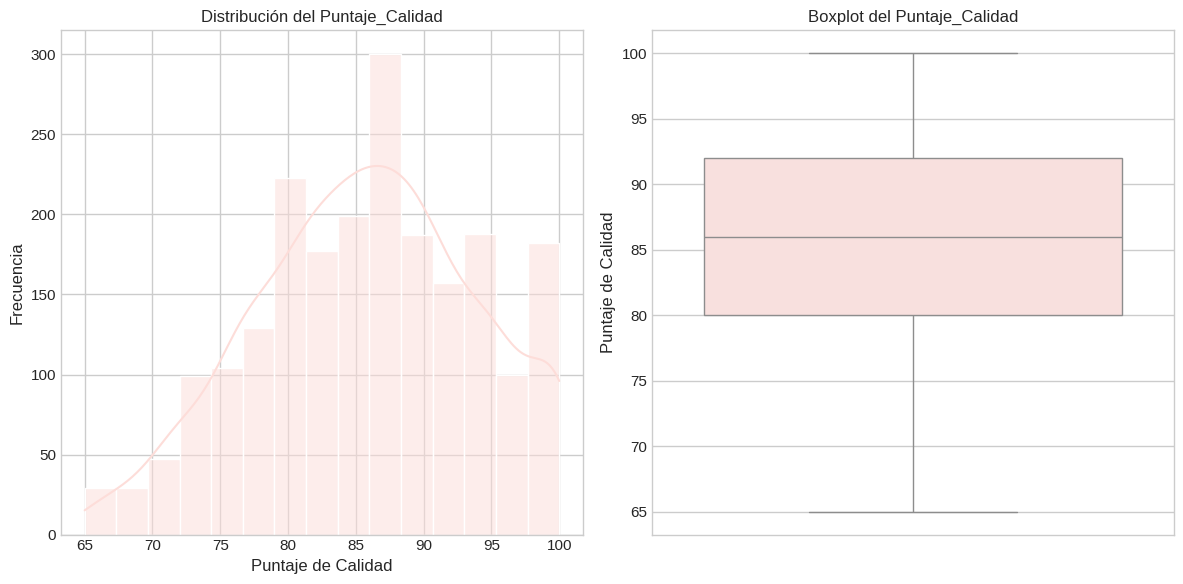


Estadísticas descriptivas para Puntaje_Calidad:
count    2150.000000
mean       85.677674
std         8.190826
min        65.000000
25%        80.000000
50%        86.000000
75%        92.000000
max       100.000000
Name: Puntaje_Calidad, dtype: float64
Mediana del Puntaje_Calidad: 86.0
Moda del Puntaje_Calidad: [100]


In [167]:
plt.figure(figsize=(12, 6))

# Histograma del Puntaje_Calidad
plt.subplot(1, 2, 1)
sns.histplot(df_vinos['Puntaje_Calidad'], kde=True, bins=15)
plt.title('Distribución del Puntaje_Calidad')
plt.xlabel('Puntaje de Calidad')
plt.ylabel('Frecuencia')

# Boxplot del Puntaje_Calidad
plt.subplot(1, 2, 2)
sns.boxplot(y=df_vinos['Puntaje_Calidad'])
plt.title('Boxplot del Puntaje_Calidad')
plt.ylabel('Puntaje de Calidad')

plt.tight_layout()
plt.show()

print("\nEstadísticas descriptivas para Puntaje_Calidad:")
print(df_vinos['Puntaje_Calidad'].describe())
print(f"Mediana del Puntaje_Calidad: {df_vinos['Puntaje_Calidad'].median()}")
print(f"Moda del Puntaje_Calidad: {df_vinos['Puntaje_Calidad'].mode().to_list()}")

### 4.3. Análisis de Valores Nulos

Visualizaremos la presencia y distribución de valores nulos en el dataset utilizando la librería `missingno`.

Visualización de la matriz de nulos:


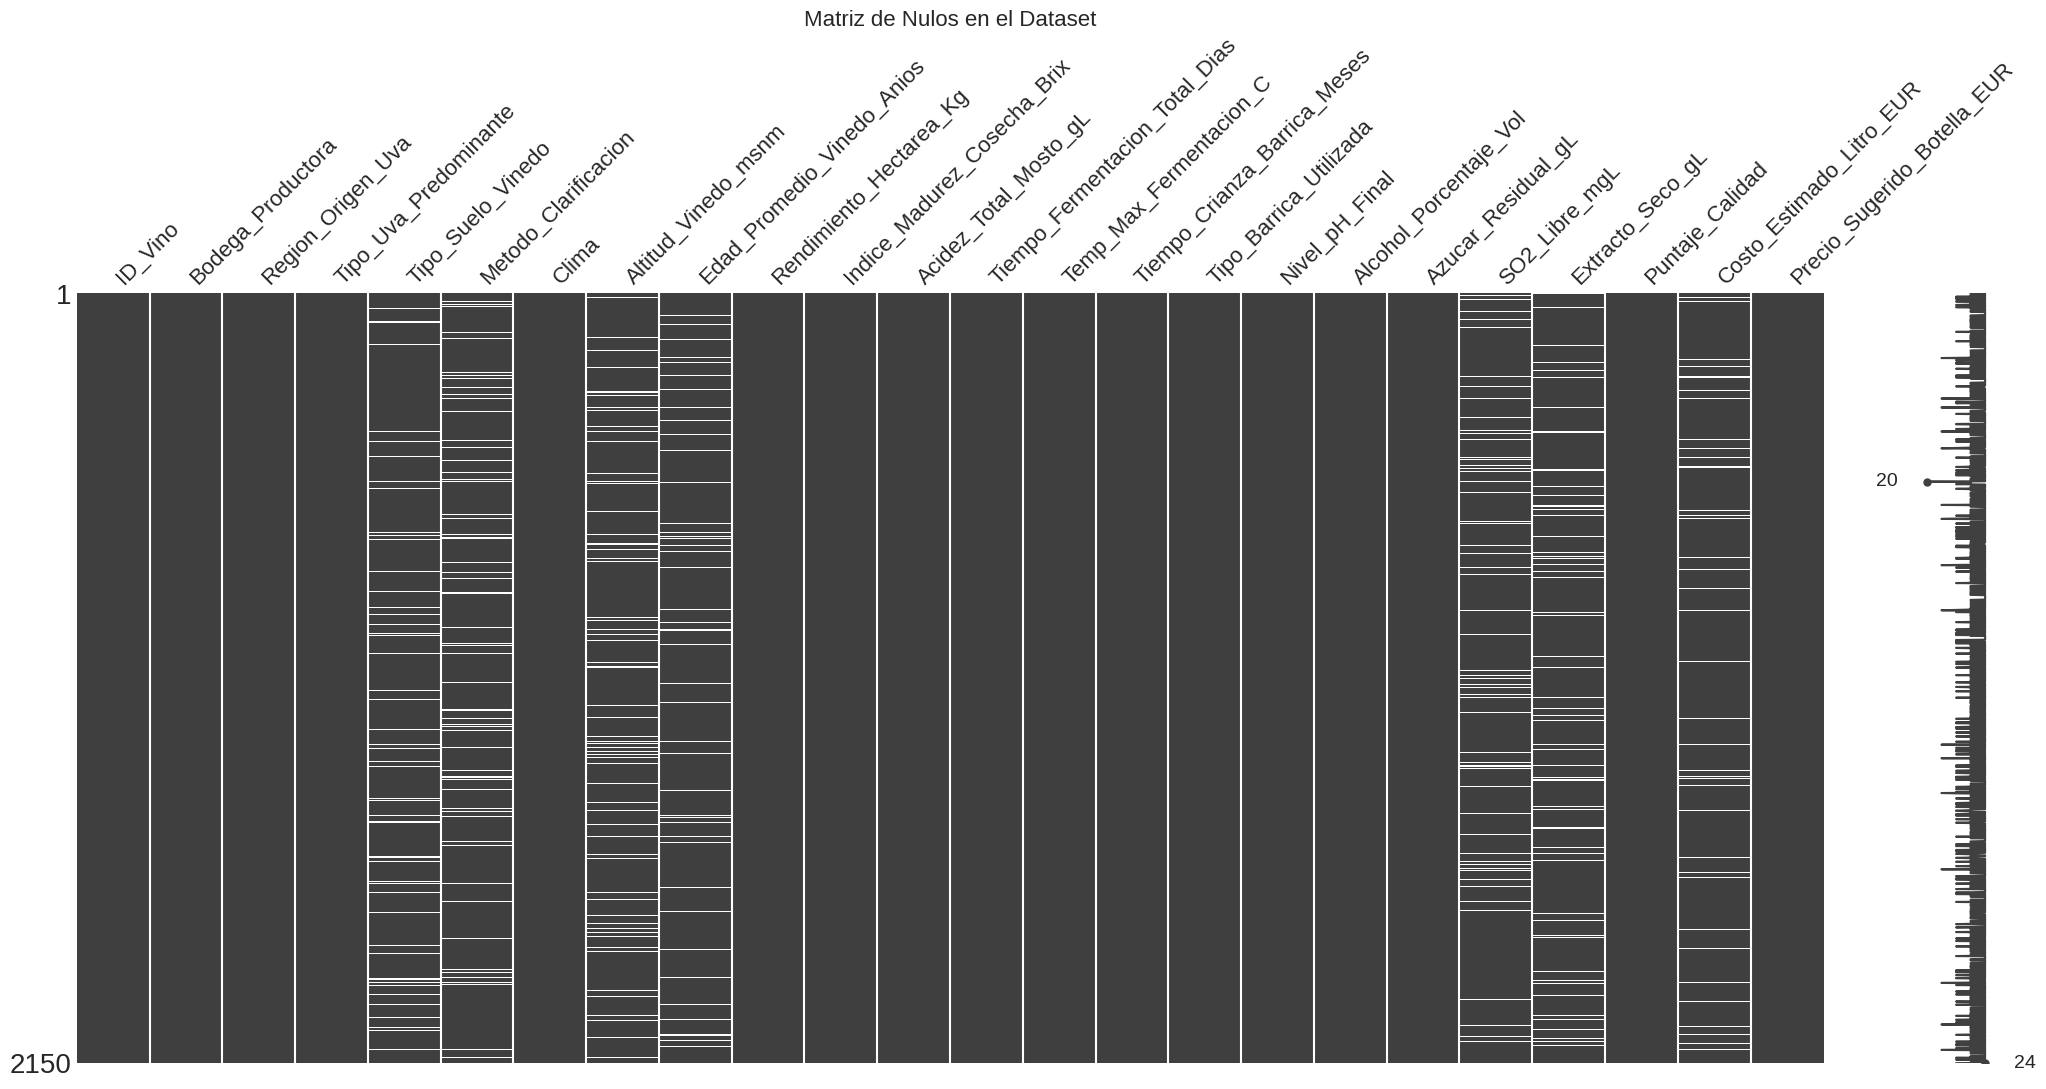


Visualización de la barra de nulos:


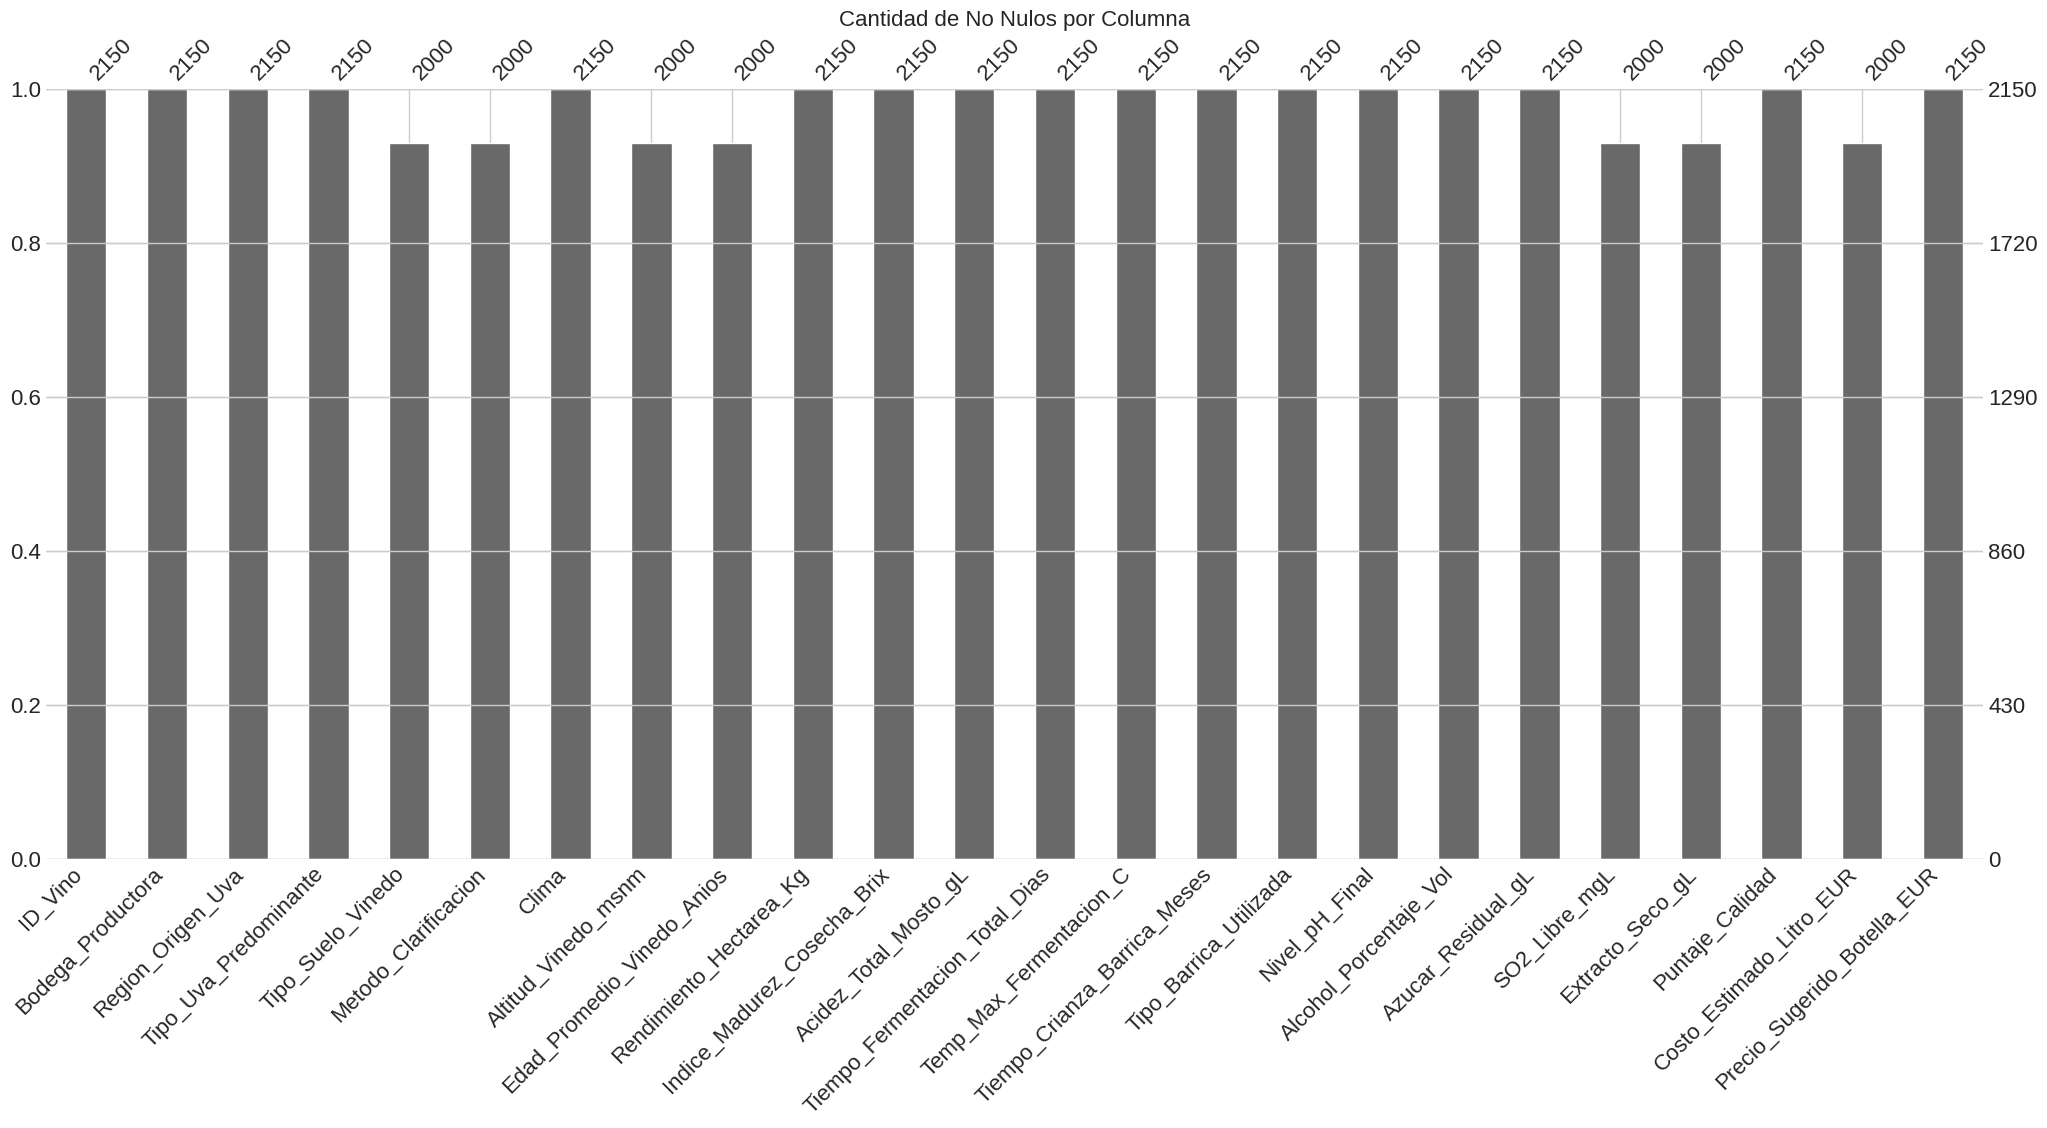


Resumen de valores nulos por columna:


,Nulos,Porcentaje_Nulos
Tipo_Suelo_Vinedo,150,6.976744
Metodo_Clarificacion,150,6.976744
Altitud_Vinedo_msnm,150,6.976744
Edad_Promedio_Vinedo_Anios,150,6.976744
SO2_Libre_mgL,150,6.976744
Extracto_Seco_gL,150,6.976744
Costo_Estimado_Litro_EUR,150,6.976744


In [168]:
# Visualización de nulos con missingno
print("Visualización de la matriz de nulos:")
msno.matrix(df_vinos)
plt.title('Matriz de Nulos en el Dataset', fontsize=16)
plt.show()

print("\nVisualización de la barra de nulos:")
msno.bar(df_vinos)
plt.title('Cantidad de No Nulos por Columna', fontsize=16)
plt.show()

# Porcentaje de nulos por columna
null_counts = df_vinos.isnull().sum()
null_percentages = (null_counts / len(df_vinos)) * 100
null_summary = pd.DataFrame({'Nulos': null_counts, 'Porcentaje_Nulos': null_percentages})
print("\nResumen de valores nulos por columna:")
display(null_summary[null_summary['Nulos'] > 0].sort_values(by='Porcentaje_Nulos', ascending=False))

### 4.4. Análisis de Variables Numéricas Predictoras

Exploraremos la distribución de las variables numéricas y su relación con `Puntaje_Calidad`.

Variables numéricas a analizar (excluyendo ID y Puntaje_Calidad para distribuciones individuales): ['Altitud_Vinedo_msnm', 'Edad_Promedio_Vinedo_Anios', 'Rendimiento_Hectarea_Kg', 'Indice_Madurez_Cosecha_Brix', 'Acidez_Total_Mosto_gL', 'Tiempo_Fermentacion_Total_Dias', 'Temp_Max_Fermentacion_C', 'Tiempo_Crianza_Barrica_Meses', 'Nivel_pH_Final', 'Alcohol_Porcentaje_Vol', 'Azucar_Residual_gL', 'SO2_Libre_mgL', 'Extracto_Seco_gL', 'Costo_Estimado_Litro_EUR', 'Precio_Sugerido_Botella_EUR']

Distribución de Variables Numéricas Predictoras:


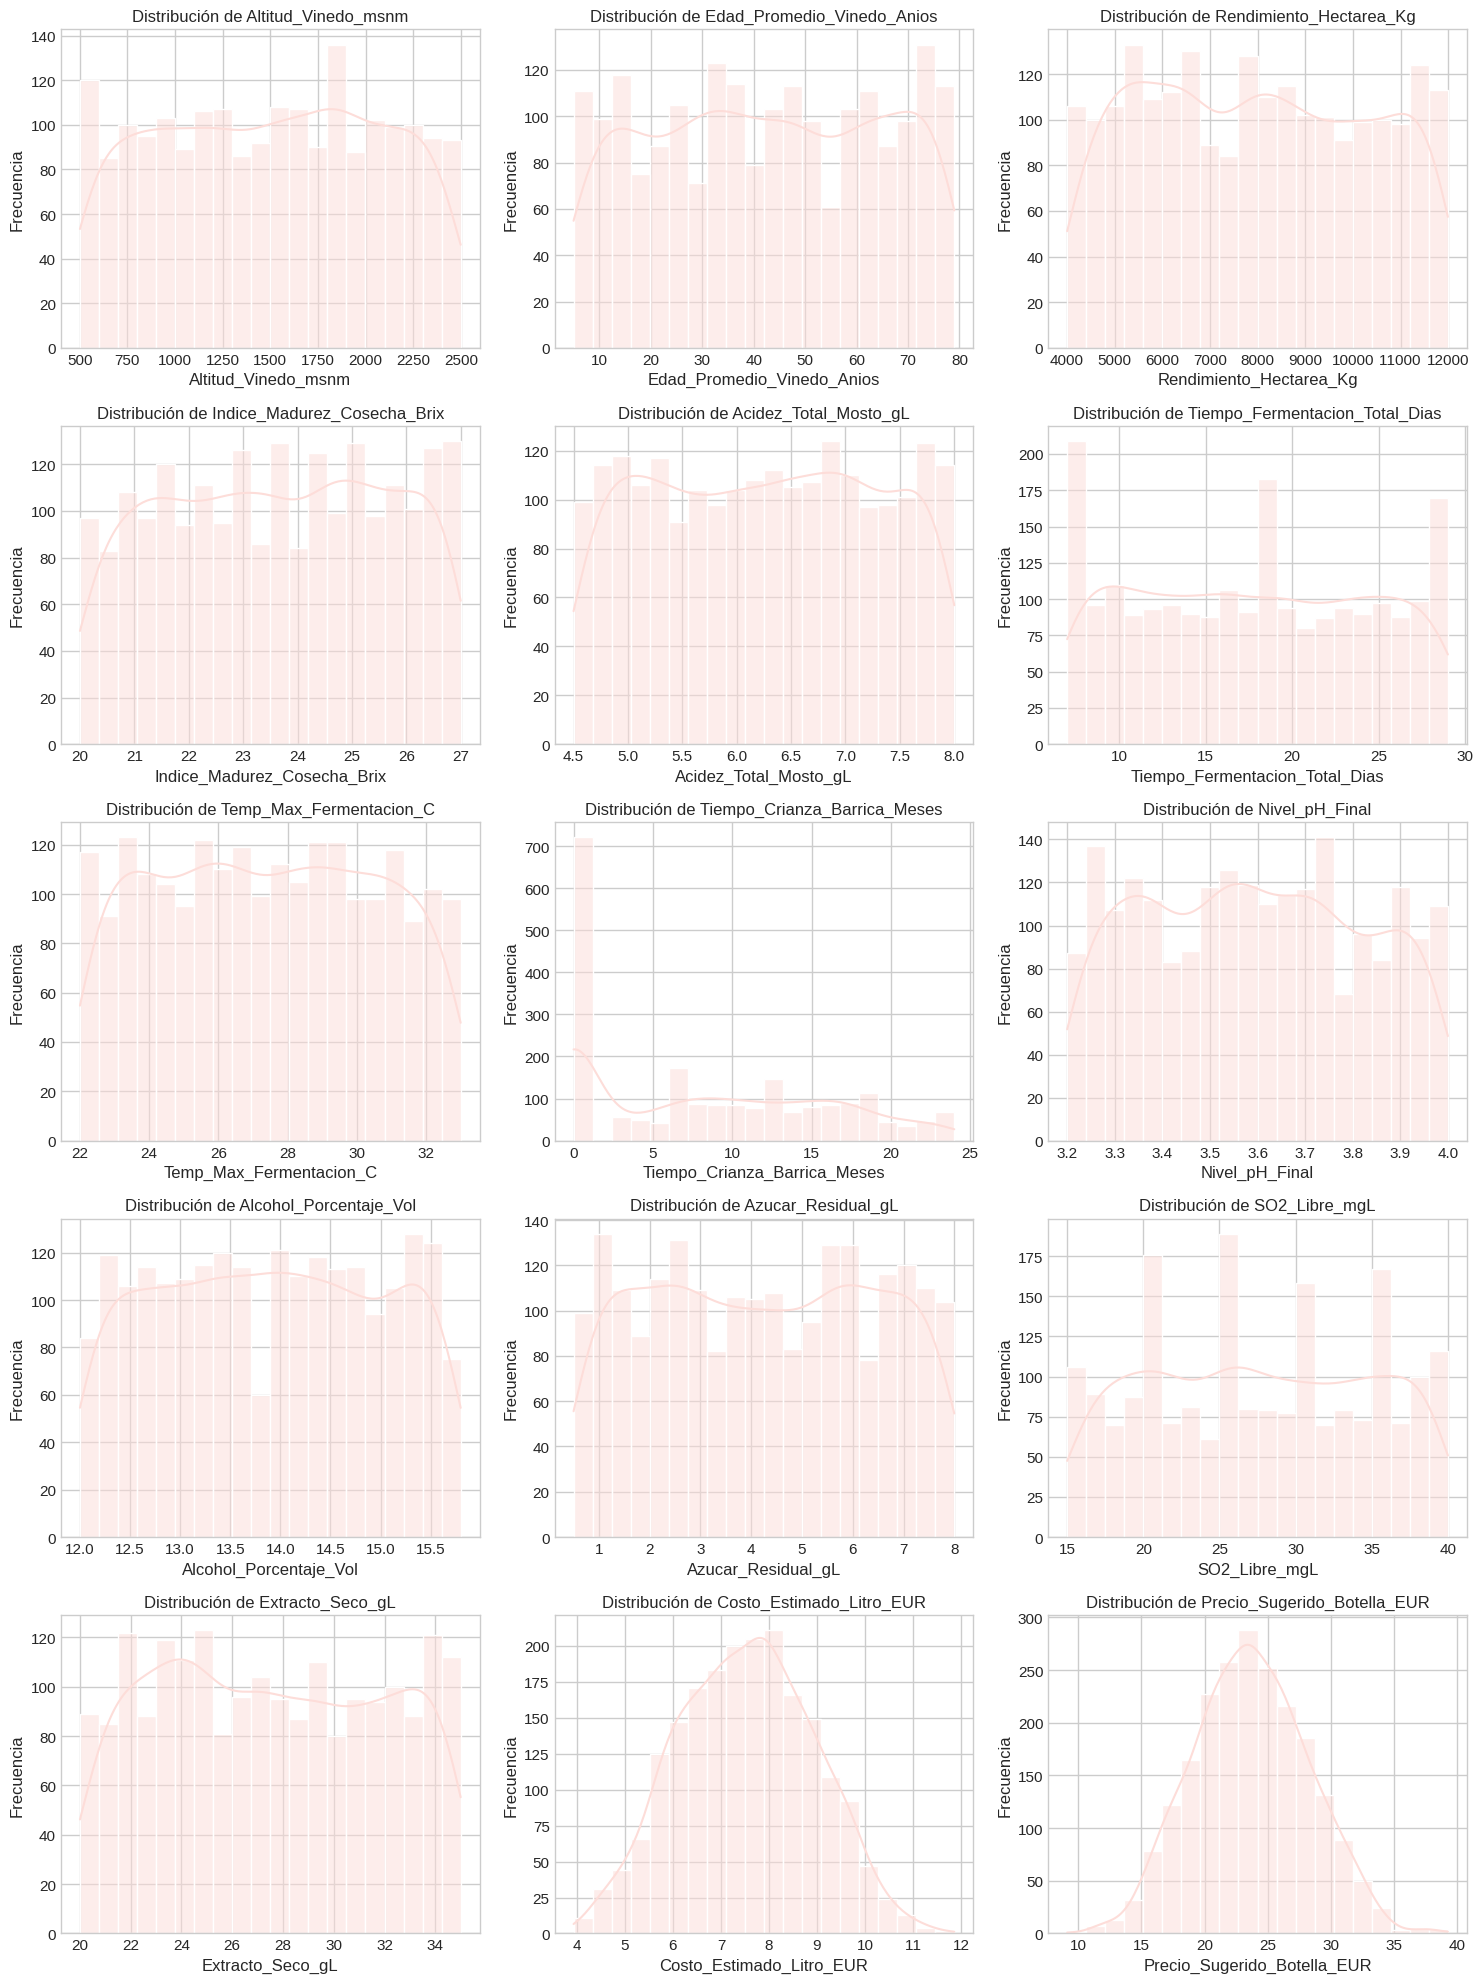


Correlación de Pearson de variables numéricas con Puntaje_Calidad:


,Puntaje_Calidad
Tiempo_Crianza_Barrica_Meses,0.459371
Precio_Sugerido_Botella_EUR,0.399100
Indice_Madurez_Cosecha_Brix,0.351258
Edad_Promedio_Vinedo_Anios,0.244830
Altitud_Vinedo_msnm,0.146730
Temp_Max_Fermentacion_C,0.041133
Acidez_Total_Mosto_gL,0.036414
Azucar_Residual_gL,0.022390
Alcohol_Porcentaje_Vol,0.017275
Extracto_Seco_gL,0.006318


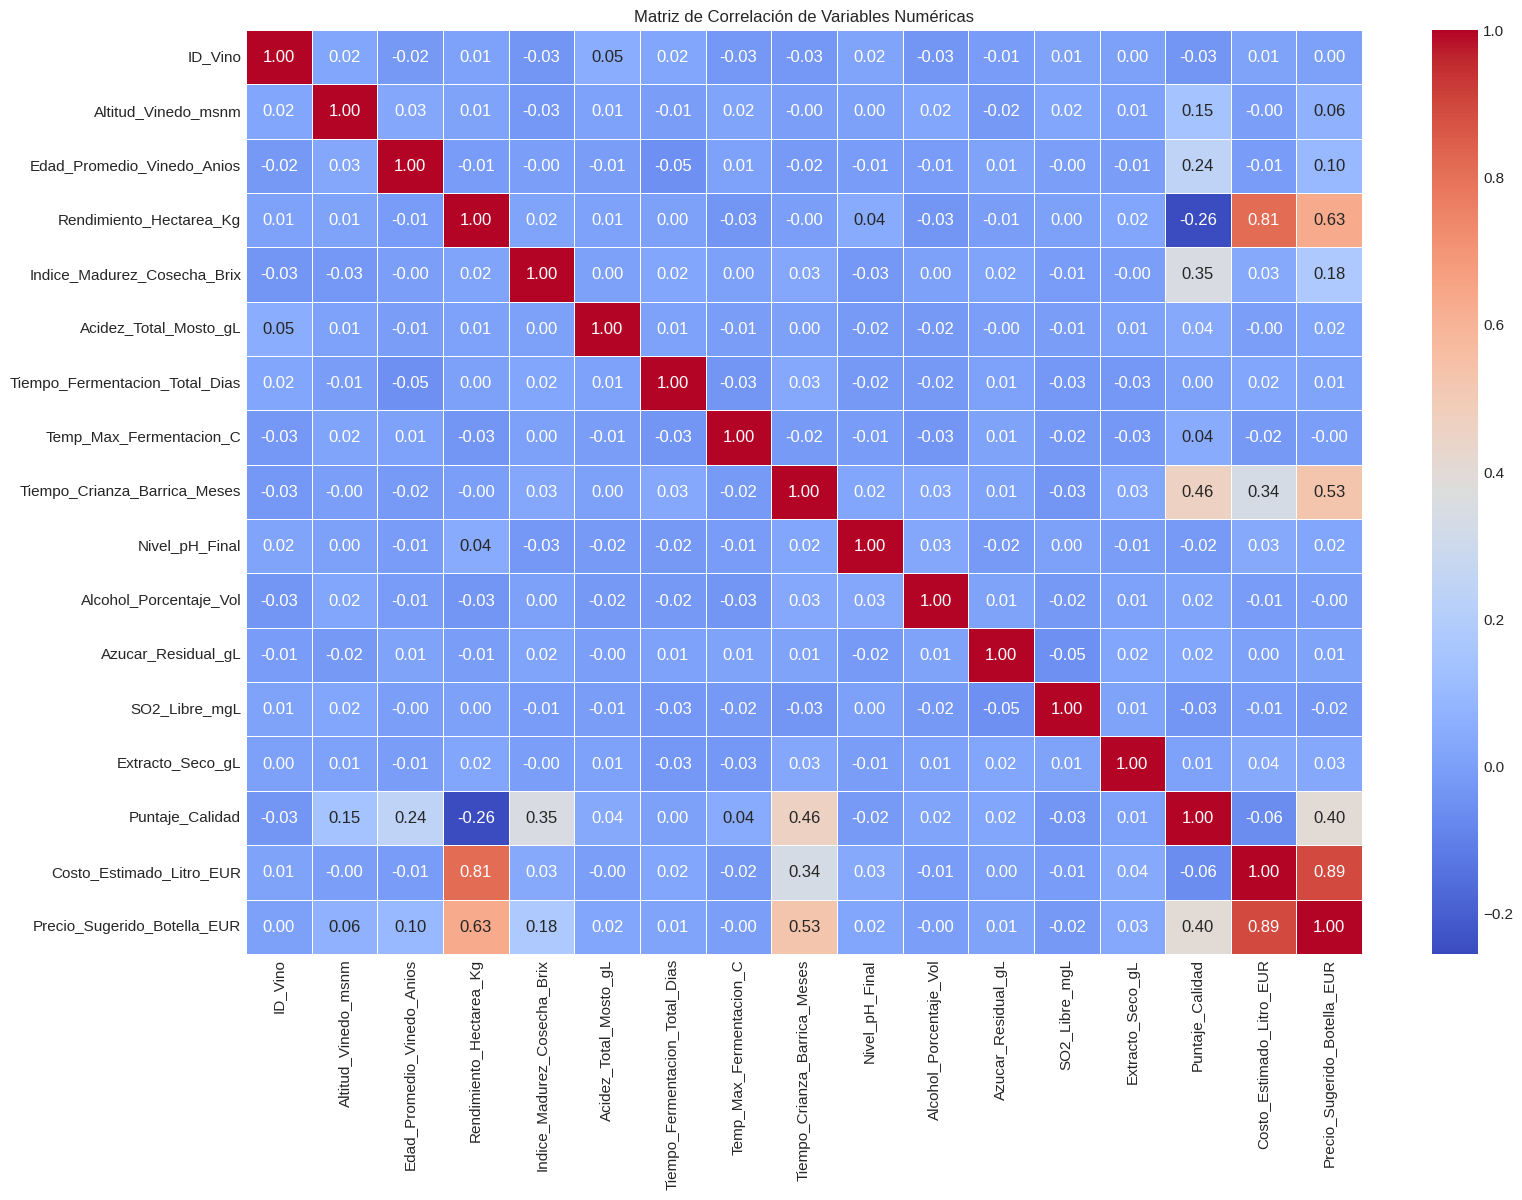

In [169]:
# Seleccionar columnas numéricas (excluyendo ID y la variable objetivo si ya la analizamos)
numerical_features = df_vinos.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('ID_Vino')
if 'Puntaje_Calidad' in numerical_features: # Ya analizada, pero podemos incluirla en correlaciones
    pass # O quitarla si no queremos redundancia en los plots individuales de distribución

# No queremos plotear la calidad otra vez si ya lo hicimos, ni el ID
plot_numerical_features = [col for col in numerical_features if col not in ['Puntaje_Calidad', 'ID_Vino']]


print(f"Variables numéricas a analizar (excluyendo ID y Puntaje_Calidad para distribuciones individuales): {plot_numerical_features}")

# Distribuciones de variables numéricas
if plot_numerical_features:
    print("\nDistribución de Variables Numéricas Predictoras:")
    num_cols = 3
    num_rows = (len(plot_numerical_features) - 1) // num_cols + 1
    plt.figure(figsize=(15, num_rows * 4))
    for i, col in enumerate(plot_numerical_features):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.histplot(df_vinos[col], kde=True, bins=20)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()
else:
    print("No hay otras variables numéricas para mostrar sus distribuciones individuales.")


# Correlación entre variables numéricas y Puntaje_Calidad
print("\nCorrelación de Pearson de variables numéricas con Puntaje_Calidad:")
if 'Puntaje_Calidad' in numerical_features:
    correlation_with_target = df_vinos[numerical_features].corr()['Puntaje_Calidad'].sort_values(ascending=False)
    display(correlation_with_target.drop('Puntaje_Calidad')) # Excluimos la correlación consigo misma
else:
    print("Puntaje_Calidad no encontrado en las columnas numéricas para calcular correlación.")

# Matriz de correlación completa
plt.figure(figsize=(18, 12))
# Asegurarnos de que solo las columnas numéricas estén presentes antes de calcular la correlación
numeric_df_for_corr = df_vinos.select_dtypes(include=np.number)
correlation_matrix = numeric_df_for_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

### 4.5. Análisis de Variables Categóricas Predictoras

Exploraremos la distribución de las variables categóricas y cómo se relacionan con `Puntaje_Calidad`.

Variables categóricas a analizar: ['Bodega_Productora', 'Region_Origen_Uva', 'Tipo_Uva_Predominante', 'Tipo_Suelo_Vinedo', 'Metodo_Clarificacion', 'Clima', 'Tipo_Barrica_Utilizada']

Distribución de Variables Categóricas y su Relación con Puntaje_Calidad:


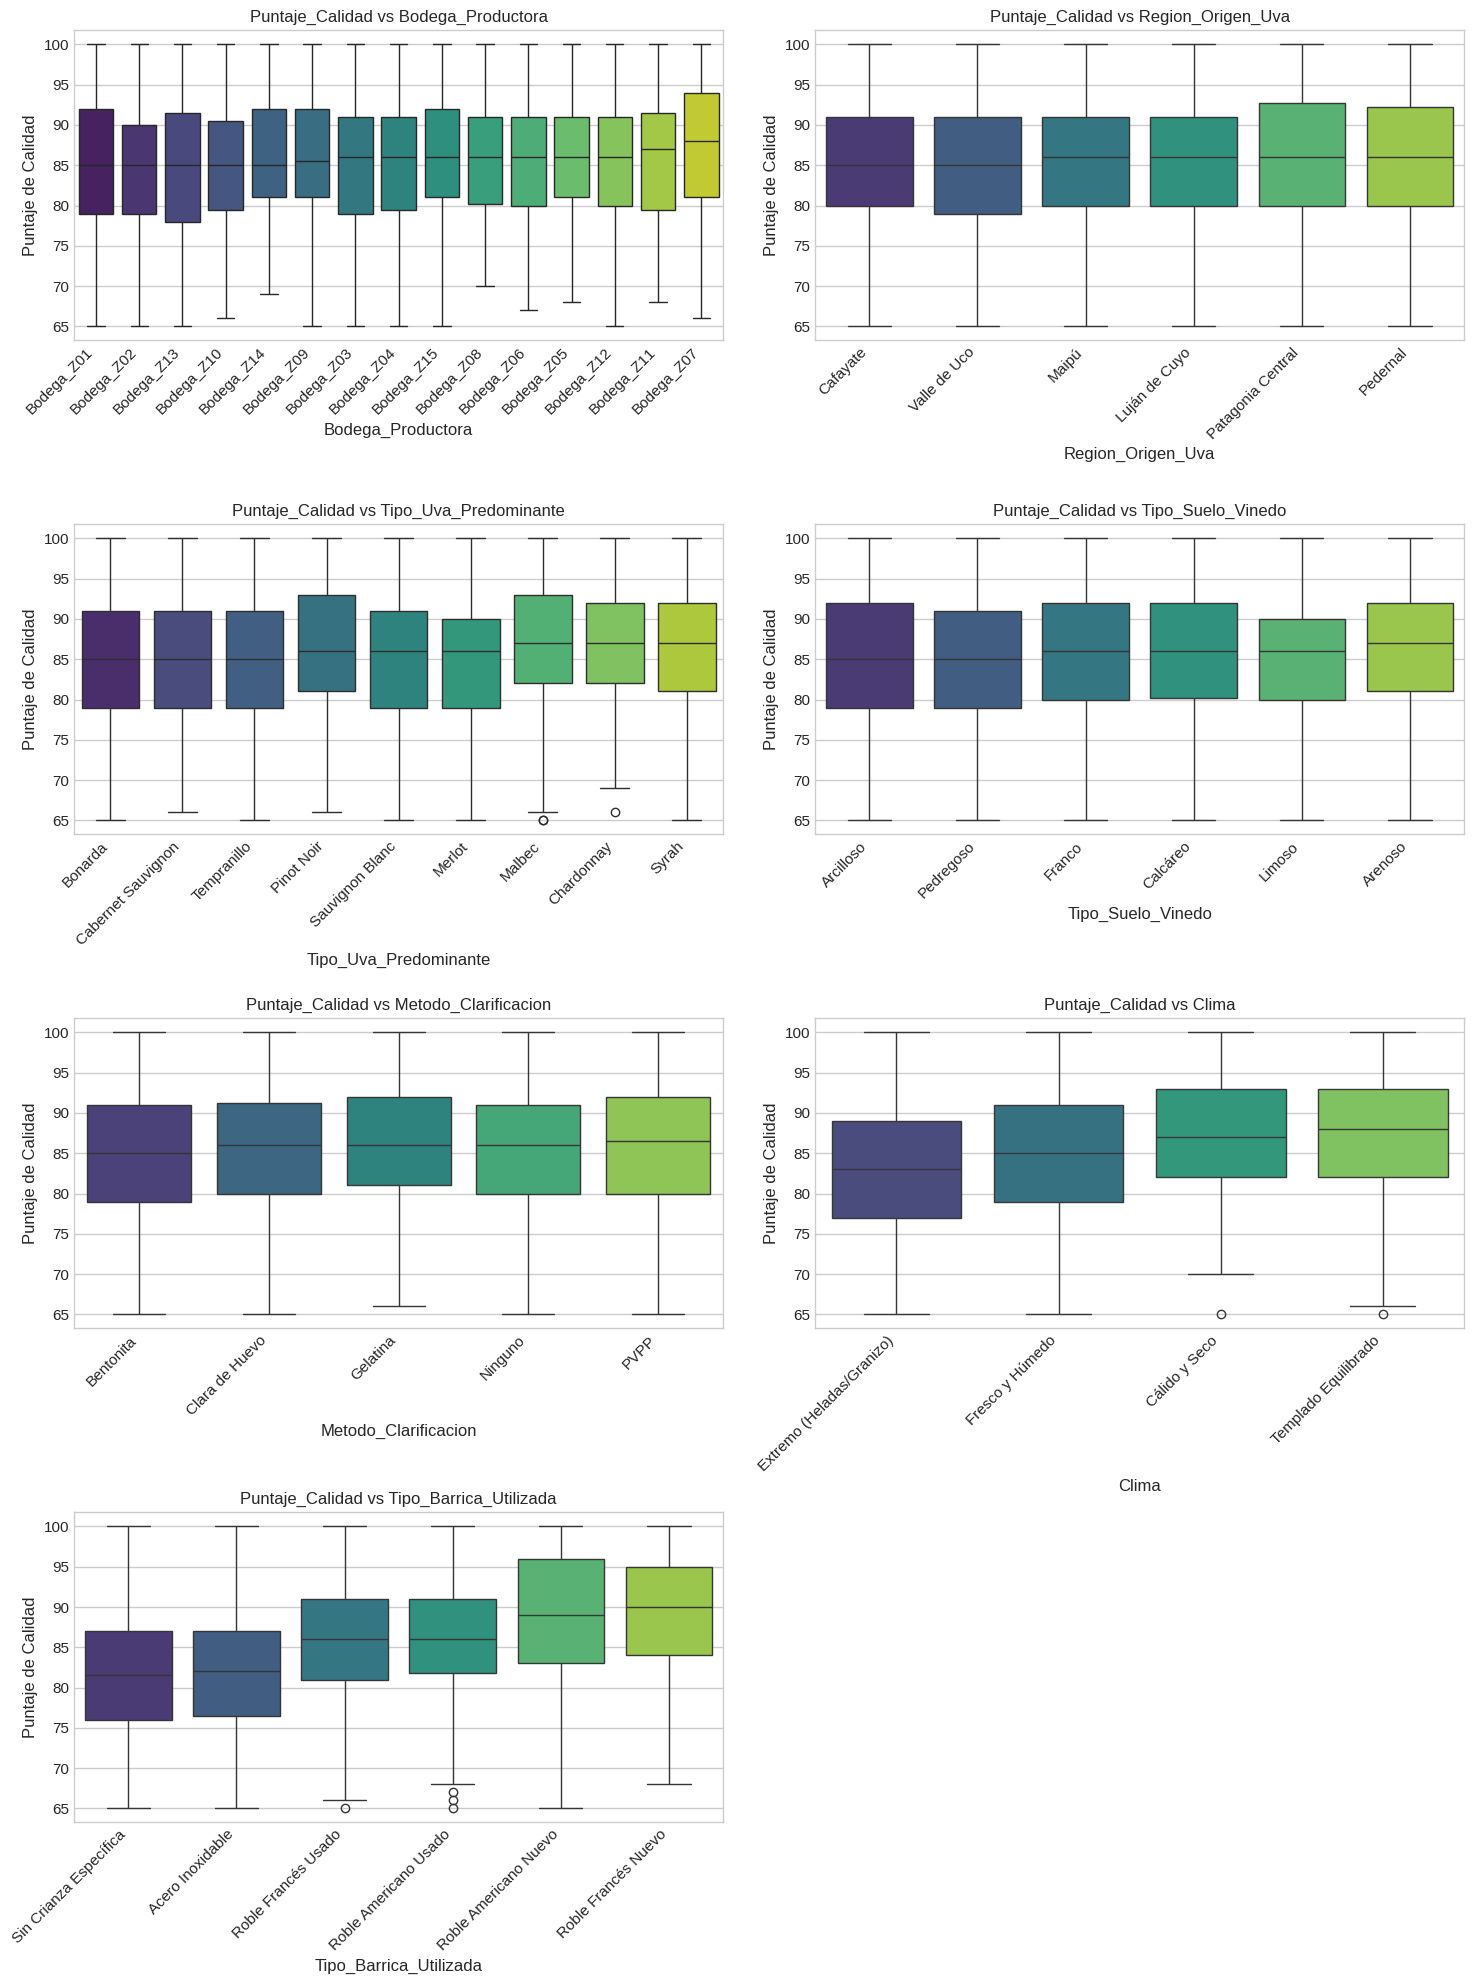


Conteo de categorías para Bodega_Productora:


,count
Bodega_Productora,
Bodega_Z09,154
Bodega_Z15,154
Bodega_Z11,151
Bodega_Z10,151
Bodega_Z06,149
Bodega_Z03,148
Bodega_Z04,143
Bodega_Z01,141
Bodega_Z05,141



Conteo de categorías para Region_Origen_Uva:


,count
Region_Origen_Uva,
Maipú,385
Cafayate,363
Luján de Cuyo,361
Pedernal,356
Valle de Uco,351
Patagonia Central,334



Conteo de categorías para Tipo_Uva_Predominante:


,count
Tipo_Uva_Predominante,
Chardonnay,263
Malbec,257
Sauvignon Blanc,250
Cabernet Sauvignon,245
Merlot,239
Tempranillo,231
Pinot Noir,222
Bonarda,222
Syrah,221



Conteo de categorías para Tipo_Suelo_Vinedo:


,count
Tipo_Suelo_Vinedo,
Limoso,367
Pedregoso,348
Arenoso,347
Franco,327
Arcilloso,325
Calcáreo,286
None,150



Conteo de categorías para Metodo_Clarificacion:


,count
Metodo_Clarificacion,
Clara de Huevo,408
Ninguno,408
Gelatina,398
PVPP,398
Bentonita,388
None,150



Conteo de categorías para Clima:


,count
Clima,
Extremo (Heladas/Granizo),550
Templado Equilibrado,539
Cálido y Seco,533
Fresco y Húmedo,528



Conteo de categorías para Tipo_Barrica_Utilizada:


,count
Tipo_Barrica_Utilizada,
Roble Americano Nuevo,371
Roble Francés Usado,364
Acero Inoxidable,363
Sin Crianza Específica,358
Roble Francés Nuevo,354
Roble Americano Usado,340


In [170]:
categorical_features = df_vinos.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Variables categóricas a analizar: {categorical_features}")

if categorical_features:
    print("\nDistribución de Variables Categóricas y su Relación con Puntaje_Calidad:")
    num_cols = 2
    num_rows_cat = (len(categorical_features) - 1) // num_cols + 1

    plt.figure(figsize=(15, num_rows_cat * 5)) # Ajustar el tamaño según sea necesario
    for i, col in enumerate(categorical_features):
        plt.subplot(num_rows_cat, num_cols, i + 1)
        # Ordenar categorías por la mediana del Puntaje_Calidad para mejor visualización
        order = df_vinos.groupby(col)['Puntaje_Calidad'].median().sort_values().index
        sns.boxplot(x=col, y='Puntaje_Calidad', data=df_vinos, order=order, palette="viridis")
        plt.title(f'Puntaje_Calidad vs {col}')
        plt.xlabel(col)
        plt.ylabel('Puntaje de Calidad')
        plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor legibilidad
    plt.tight_layout()
    plt.show()

    # También podemos ver conteos de cada categoría
    for col in categorical_features:
        print(f"\nConteo de categorías para {col}:")
        display(df_vinos[col].value_counts(dropna=False)) # dropna=False para incluir nulos si los hay
else:
    print("No hay variables categóricas para analizar.")

## 5. Preprocesamiento de Datos

In [171]:
# Creamos una copia para el modelado para no alterar el original
df_model = df_vinos.copy()

# --- Definir las características (X) y la variable objetivo (y) ---

# Variable Objetivo (Target): Puntaje_Calidad
y = df_model['Puntaje_Calidad']
print(f"Variable Objetivo (y) establecida: 'Puntaje_Calidad'")
print(f"Primeros 5 valores de y: \n{y.head()}\n")


# Características (X): Todas las columnas EXCEPTO la variable objetivo,
# el ID, y las columnas financieras que no se usarán para predecir calidad.
features_to_exclude = ['ID_Vino', 'Puntaje_Calidad', 'Costo_Estimado_Litro_EUR', 'Precio_Sugerido_Botella_EUR']
X = df_model.drop(columns=features_to_exclude)

print(f"Características (X) definidas. Dimensiones de X: {X.shape}")
print(f"Columnas en X: \n{X.columns.tolist()}\n")
print(f"Primeras filas de X:")
display(X.head())


# --- Identificar tipos de características para el preprocesamiento ---

# Identificar columnas numéricas
# Usamos select_dtypes para encontrar todas las columnas que son de tipo numérico (int, float)
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

# Identificar columnas categóricas
# Usamos select_dtypes para encontrar todas las columnas que son de tipo 'object' (generalmente strings)
# Podríamos también incluir 'category' si hubiéramos convertido alguna columna a ese dtype explícitamente.
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\nCaracterísticas numéricas identificadas ({len(numerical_features)}):")
for i, feature in enumerate(numerical_features):
    print(f"  {i+1}. {feature} (dtype: {X[feature].dtype})")

print(f"\nCaracterísticas categóricas identificadas ({len(categorical_features)}):")
for i, feature in enumerate(categorical_features):
    print(f"  {i+1}. {feature} (dtype: {X[feature].dtype})")

# Revisar si alguna columna se quedó fuera (no debería si todas son numéricas u object)
remaining_cols = set(X.columns) - set(numerical_features) - set(categorical_features)
if remaining_cols:
    print(f"\nADVERTENCIA: Algunas columnas no fueron clasificadas como numéricas ni categóricas: {remaining_cols}")
else:
    print("\nTodas las columnas en X han sido clasificadas como numéricas o categóricas.")

Variable Objetivo (y) establecida: 'Puntaje_Calidad'
Primeros 5 valores de y: 
0    96
1    89
2    79
3    84
4    83
Name: Puntaje_Calidad, dtype: int64

Características (X) definidas. Dimensiones de X: (2150, 20)
Columnas en X: 
['Bodega_Productora', 'Region_Origen_Uva', 'Tipo_Uva_Predominante', 'Tipo_Suelo_Vinedo', 'Metodo_Clarificacion', 'Clima', 'Altitud_Vinedo_msnm', 'Edad_Promedio_Vinedo_Anios', 'Rendimiento_Hectarea_Kg', 'Indice_Madurez_Cosecha_Brix', 'Acidez_Total_Mosto_gL', 'Tiempo_Fermentacion_Total_Dias', 'Temp_Max_Fermentacion_C', 'Tiempo_Crianza_Barrica_Meses', 'Tipo_Barrica_Utilizada', 'Nivel_pH_Final', 'Alcohol_Porcentaje_Vol', 'Azucar_Residual_gL', 'SO2_Libre_mgL', 'Extracto_Seco_gL']

Primeras filas de X:


,Bodega_Productora,Region_Origen_Uva,Tipo_Uva_Predominante,Tipo_Suelo_Vinedo,Metodo_Clarificacion,Clima,Altitud_Vinedo_msnm,Edad_Promedio_Vinedo_Anios,Rendimiento_Hectarea_Kg,Indice_Madurez_Cosecha_Brix,Acidez_Total_Mosto_gL,Tiempo_Fermentacion_Total_Dias,Temp_Max_Fermentacion_C,Tiempo_Crianza_Barrica_Meses,Tipo_Barrica_Utilizada,Nivel_pH_Final,Alcohol_Porcentaje_Vol,Azucar_Residual_gL,SO2_Libre_mgL,Extracto_Seco_gL
0,Bodega_Z01,Maipú,Malbec,Pedregoso,PVPP,Fresco y Húmedo,1590.0,64.0,7197.0,23.3,6.89,28,28.4,6,Roble Americano Usado,3.22,13.8,2.5,17.0,26.0
1,Bodega_Z04,Cafayate,Chardonnay,Limoso,PVPP,Cálido y Seco,1269.0,50.0,8296.0,25.8,7.97,11,31.6,16,Roble Francés Nuevo,3.74,15.6,6.2,22.0,NaN
2,Bodega_Z05,Valle de Uco,Tempranillo,Arcilloso,None,Fresco y Húmedo,2159.0,48.0,6763.0,25.8,5.26,27,24.9,0,Acero Inoxidable,3.90,15.3,0.5,34.0,28.5
3,Bodega_Z14,Maipú,Malbec,Arenoso,Gelatina,Fresco y Húmedo,1266.0,15.0,5684.0,21.3,6.74,22,28.0,19,Roble Americano Nuevo,3.82,15.2,1.5,30.0,30.8
4,Bodega_Z05,Valle de Uco,Merlot,Limoso,PVPP,Templado Equilibrado,2111.0,26.0,6882.0,23.5,6.13,7,30.0,6,Roble Americano Usado,3.30,15.2,6.2,27.0,25.5



Características numéricas identificadas (13):
  1. Altitud_Vinedo_msnm (dtype: float64)
  2. Edad_Promedio_Vinedo_Anios (dtype: float64)
  3. Rendimiento_Hectarea_Kg (dtype: float64)
  4. Indice_Madurez_Cosecha_Brix (dtype: float64)
  5. Acidez_Total_Mosto_gL (dtype: float64)
  6. Tiempo_Fermentacion_Total_Dias (dtype: int64)
  7. Temp_Max_Fermentacion_C (dtype: float64)
  8. Tiempo_Crianza_Barrica_Meses (dtype: int64)
  9. Nivel_pH_Final (dtype: float64)
  10. Alcohol_Porcentaje_Vol (dtype: float64)
  11. Azucar_Residual_gL (dtype: float64)
  12. SO2_Libre_mgL (dtype: float64)
  13. Extracto_Seco_gL (dtype: float64)

Características categóricas identificadas (7):
  1. Bodega_Productora (dtype: object)
  2. Region_Origen_Uva (dtype: object)
  3. Tipo_Uva_Predominante (dtype: object)
  4. Tipo_Suelo_Vinedo (dtype: object)
  5. Metodo_Clarificacion (dtype: object)
  6. Clima (dtype: object)
  7. Tipo_Barrica_Utilizada (dtype: object)

Todas las columnas en X han sido clasificadas como n

In [172]:
# --- Creación de los Pipelines de Preprocesamiento para cada tipo de característica ---

# Pipeline para características numéricas:
# 1. Imputar valores nulos con la mediana.
# 2. Escalar las características.
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputar NaNs con la mediana
    ('scaler', StandardScaler())                    # Escalar
])

# Pipeline para características categóricas:
# 1. Imputar valores nulos con el valor más frecuente (moda).
# 2. Aplicar One-Hot Encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Imputar NaNs con la moda
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # Codificar
    # handle_unknown='ignore': si aparece una categoría nueva en test/predicción que no estaba en train, la ignora (todas las nuevas columnas OHE serán 0)
    # sparse_output=False: devuelve un array denso, más fácil de inspeccionar y usar con algunas herramientas. Si tienes muchísimas categorías, True podría ser más eficiente en memoria.
])

# --- Crear el Preprocesador usando ColumnTransformer ---
# Este objeto aplicará el 'numerical_transformer' a las columnas en 'numerical_features'
# y el 'categorical_transformer' a las columnas en 'categorical_features'.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # ¿Qué hacer con las columnas no especificadas?
                            # 'passthrough': las deja como están (útil para debug o si hay columnas que no necesitan preproc)
                            # 'drop': las elimina (más común si estás seguro de que has cubierto todas las features necesarias)
                            # Para este caso, como hemos identificado todas las columnas relevantes en numerical_features y categorical_features,
                            # podríamos usar 'drop'. Si 'features_to_exclude' se manejó correctamente, no debería haber "restos".
                            # Usar 'passthrough' inicialmente puede ser más seguro para verificar.
)

print("Preprocessor (ColumnTransformer) creado exitosamente.")
print("Este preprocesador está listo para ser integrado en un pipeline con el modelo.")

Preprocessor (ColumnTransformer) creado exitosamente.
Este preprocesador está listo para ser integrado en un pipeline con el modelo.


In [173]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Altitud_Vinedo_msnm',
                                  'Edad_Promedio_Vinedo_Anios',
                                  'Rendimiento_Hectarea_Kg',
                                  'Indice_Madurez_Cosecha_Brix',
                                  'Acidez_Total_Mosto_gL',
                                  'Tiempo_Fermentacion_Total_Dias',
                                  'Temp_Max_Fermentacion_C',
                                  'Tiem...
                                  'Nivel_pH_Final', 'Alcohol_Porcentaje_Vol',
                                  'Azucar_Residual_gL', 'SO2_Libre_mgL',
                                  'Extracto_Seco_gL']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Bodega_Productora', 'Region_Origen_Uva',
                                  'Tipo_Uva_Predominante', 'Tipo_Suelo_Vinedo',
                                  'Metodo_Clarificacion', 'Clima',
                                  'Tipo_Barrica_Utilizada'])])

## 6. División de Datos (Train/Test Split)

In [174]:
# --- Dividir los Datos en Conjuntos de Entrenamiento y Prueba ---
# Usaremos un 80% para entrenamiento y un 20% para prueba.
# random_state asegura que la división sea la misma cada vez, para reproducibilidad.

X_train, X_test, y_train, y_test = train_test_split(
    X,  # DataFrame de características
    y,  # Serie de la variable objetivo
    test_size=0.2,  # Proporción del dataset a incluir en el split de prueba (20%)
    random_state=42 # Semilla para la aleatoriedad, asegura reproducibilidad
)

print("División de datos completada.")
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de y_test: {y_test.shape}")

print("\nPrimeras 5 filas de X_train:")
display(X_train.head())

print("\nPrimeras 5 filas de y_train:")
display(y_train.head())

División de datos completada.
Forma de X_train: (1720, 20)
Forma de X_test: (430, 20)
Forma de y_train: (1720,)
Forma de y_test: (430,)

Primeras 5 filas de X_train:


,Bodega_Productora,Region_Origen_Uva,Tipo_Uva_Predominante,Tipo_Suelo_Vinedo,Metodo_Clarificacion,Clima,Altitud_Vinedo_msnm,Edad_Promedio_Vinedo_Anios,Rendimiento_Hectarea_Kg,Indice_Madurez_Cosecha_Brix,Acidez_Total_Mosto_gL,Tiempo_Fermentacion_Total_Dias,Temp_Max_Fermentacion_C,Tiempo_Crianza_Barrica_Meses,Tipo_Barrica_Utilizada,Nivel_pH_Final,Alcohol_Porcentaje_Vol,Azucar_Residual_gL,SO2_Libre_mgL,Extracto_Seco_gL
1433,Bodega_Z14,Maipú,Pinot Noir,Calcáreo,Clara de Huevo,Fresco y Húmedo,2176.0,71.0,4750.0,20.0,7.78,13,28.8,0,Sin Crianza Específica,3.58,15.1,6.7,40.0,NaN
630,Bodega_Z07,Cafayate,Sauvignon Blanc,Arcilloso,Ninguno,Cálido y Seco,1415.0,NaN,6314.0,22.1,7.95,14,32.8,14,Roble Americano Nuevo,3.79,14.7,7.5,NaN,30.3
78,Bodega_Z12,Patagonia Central,Malbec,Pedregoso,PVPP,Extremo (Heladas/Granizo),1511.0,9.0,5538.0,25.8,6.27,14,22.5,18,Roble Francés Usado,3.30,14.5,1.4,26.0,21.8
366,Bodega_Z07,Pedernal,Tempranillo,Pedregoso,Clara de Huevo,Cálido y Seco,1708.0,NaN,11093.0,23.9,7.58,12,27.1,8,Roble Americano Nuevo,3.38,13.6,2.7,25.0,32.5
1997,Bodega_Z06,Patagonia Central,Tempranillo,Arcilloso,Ninguno,Fresco y Húmedo,568.0,31.0,7833.0,23.6,5.58,9,22.2,0,Sin Crianza Específica,3.35,12.9,4.0,39.0,24.4



Primeras 5 filas de y_train:


,Puntaje_Calidad
1433,84
630,92
78,92
366,85
1997,72


## 7. Construcción y Entrenamiento del Modelo (Random Forest Regressor)

In [176]:
# --- Creación del Pipeline Completo: Preprocesador + Modelo ---

# Definir el modelo de RandomForestRegressor con los hiperparámetros especificados
# n_estimators: número de árboles. 100 es un buen inicio.
# random_state: para reproducibilidad del modelo.
# n_jobs=-1: usa todos los procesadores disponibles para paralelizar el entrenamiento.
# max_depth: profundidad máxima de cada árbol. Limitarla puede ayudar a prevenir el overfitting.
# min_samples_split: el número mínimo de muestras requeridas para dividir un nodo interno.
#                    Aumentarlo puede ayudar a prevenir el overfitting creando árboles menos complejos.
rf_regressor = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    max_depth=10,         # Hiperparámetro añadido para control de overfitting
    min_samples_split=5   # Hiperparámetro añadido para control de overfitting
)

# Crear el pipeline que primero aplica el 'preprocessor' y luego entrena el 'regressor'
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Primer paso: el preprocesador que definimos
    ('regressor', rf_regressor)      # Segundo paso: el modelo RandomForestRegressor
])

print("Pipeline de modelo creado exitosamente.")

# Ahora este 'model_pipeline' está listo para ser entrenado con model_pipeline.fit(X_train, y_train)

Pipeline de modelo creado exitosamente.


In [178]:
print("Iniciando el entrenamiento del pipeline completo...")
print(f"Dimensiones de X_train antes del entrenamiento: {X_train.shape}")
print(f"Dimensiones de y_train antes del entrenamiento: {y_train.shape}")

# --- Entrenar el Pipeline Completo ---
# Esto ajustará el preprocesador a X_train, transformará X_train,
# y luego entrenará el RandomForestRegressor con los datos transformados y y_train.
model_pipeline.fit(X_train, y_train)

print("\nEntrenamiento del pipeline completado.")
print("El modelo dentro del pipeline está ahora ajustado y listo para hacer predicciones.")

# Opcional: puedes verificar que el modelo está "ajustado"
# (aunque no hay un atributo simple como .is_fitted_ para todo el pipeline,
# podrías verificar el regresor interno si quisieras, pero el hecho de que .fit()
# no dé error es la principal indicación)
# Ejemplo de cómo acceder al modelo entrenado dentro del pipeline:
# trained_regressor = model_pipeline.named_steps['regressor']
# print(f"El regresor entrenado es: {trained_regressor}")

Iniciando el entrenamiento del pipeline completo...
Dimensiones de X_train antes del entrenamiento: (1720, 20)
Dimensiones de y_train antes del entrenamiento: (1720,)

Entrenamiento del pipeline completado.
El modelo dentro del pipeline está ahora ajustado y listo para hacer predicciones.


In [179]:
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Altitud_Vinedo_msnm',
                                                   'Edad_Promedio_Vinedo_Anios',
                                                   'Rendimiento_Hectarea_Kg',
                                                   'Indice_Madurez_Cosecha_Brix',
                                                   'Acidez_Total_Mosto_gL',
                                                   'Tiempo_Fermentacion_Total_Dias'...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Bodega_Productora',
                                                   'Region_Origen_Uva',
                                                   'Tipo_Uva_Predominante',
                                                   'Tipo_Suelo_Vinedo',
                                                   'Metodo_Clarificacion',
                                                   'Clima',
                                                   'Tipo_Barrica_Utilizada'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_split=5,
                                       n_jobs=-1, random_state=42))])

## 8. Evaluación del Modelo

In [180]:
print("Realizando predicciones en el conjunto de prueba (X_test)...")
print(f"Dimensiones de X_test: {X_test.shape}")

# --- Realizar Predicciones en el Conjunto de Prueba ---
# El pipeline automáticamente aplicará el preprocesamiento (ajustado con X_train)
# a X_test y luego usará el modelo entrenado para predecir.
y_pred = model_pipeline.predict(X_test)

print("\nPredicciones realizadas.")
print(f"Forma del array de predicciones (y_pred): {y_pred.shape}")
print(f"Primeras 5 predicciones: {y_pred[:5]}")
print(f"Primeros 5 valores reales de y_test (para comparación visual rápida): {y_test.values[:5]}")

# y_pred ahora contiene las predicciones del modelo para el Puntaje_Calidad
# para cada vino en el conjunto de prueba.
# El siguiente paso será comparar estas predicciones (y_pred) con los
# valores reales (y_test) para evaluar el rendimiento del modelo.

Realizando predicciones en el conjunto de prueba (X_test)...
Dimensiones de X_test: (430, 20)

Predicciones realizadas.
Forma del array de predicciones (y_pred): (430,)
Primeras 5 predicciones: [83.43506204 84.27785225 87.52622197 91.00758559 92.1833004 ]
Primeros 5 valores reales de y_test (para comparación visual rápida): [ 75  79  87 100  88]


In [182]:
# --- Importar las funciones de métricas ---
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Para np.sqrt

# --- Evaluación del Modelo ---

# Calcular las métricas de regresión
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # O alternativamente: mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("--- Métricas de Evaluación del Modelo de Regresión (Puntaje_Calidad) ---")
print(f"Error Absoluto Medio (MAE):       {mae:.4f} puntos")
print(f"Error Cuadrático Medio (MSE):      {mse:.4f} (puntos^2)")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f} puntos")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

print("\nInterpretación de las métricas para Puntaje_Calidad:")
print(f"- MAE: En promedio, las predicciones del modelo para el Puntaje_Calidad se desvían en aproximadamente {mae:.2f} puntos del puntaje real.")
print(f"- RMSE: Similar al MAE pero dando más peso a errores grandes. La desviación típica de los errores de predicción es de aproximadamente {rmse:.2f} puntos.")
print(f"- R²: El modelo es capaz de explicar aproximadamente el {r2*100:.2f}% de la varianza en el Puntaje_Calidad de los vinos del conjunto de prueba.")

# --- Comparación con un modelo base (opcional pero útil) ---
# Un modelo base simple sería predecir siempre la media del puntaje de calidad del conjunto de entrenamiento.
# Esto nos da un punto de referencia para ver si nuestro modelo es significativamente mejor.
from sklearn.dummy import DummyRegressor

dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train, y_train) # No necesita el preprocesador complejo, solo y_train para la media
y_pred_dummy = dummy_reg.predict(X_test) # X_test no se usa realmente para la estrategia 'mean'

mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
rmse_dummy = np.sqrt(mean_squared_error(y_test, y_pred_dummy))
r2_dummy = r2_score(y_test, y_pred_dummy) # Debería ser cercano a 0

print("\n--- Métricas de un Modelo Base (Prediciendo la Media) ---")
print(f"MAE Dummy:  {mae_dummy:.4f} puntos")
print(f"RMSE Dummy: {rmse_dummy:.4f} puntos")
print(f"R² Dummy:   {r2_dummy:.4f}")

if r2 > r2_dummy and rmse < rmse_dummy:
    print("\nNuestro modelo RandomForestRegressor supera al modelo base.")
else:
    print("\nNuestro modelo RandomForestRegressor NO supera (o es similar) al modelo base. Revisar modelo o características.")

--- Métricas de Evaluación del Modelo de Regresión (Puntaje_Calidad) ---
Error Absoluto Medio (MAE):       5.3843 puntos
Error Cuadrático Medio (MSE):      40.0690 (puntos^2)
Raíz del Error Cuadrático Medio (RMSE): 6.3300 puntos
Coeficiente de Determinación (R²): 0.4237

Interpretación de las métricas para Puntaje_Calidad:
- MAE: En promedio, las predicciones del modelo para el Puntaje_Calidad se desvían en aproximadamente 5.38 puntos del puntaje real.
- RMSE: Similar al MAE pero dando más peso a errores grandes. La desviación típica de los errores de predicción es de aproximadamente 6.33 puntos.
- R²: El modelo es capaz de explicar aproximadamente el 42.37% de la varianza en el Puntaje_Calidad de los vinos del conjunto de prueba.

--- Métricas de un Modelo Base (Prediciendo la Media) ---
MAE Dummy:  6.8966 puntos
RMSE Dummy: 8.3616 puntos
R² Dummy:   -0.0055

Nuestro modelo RandomForestRegressor supera al modelo base.


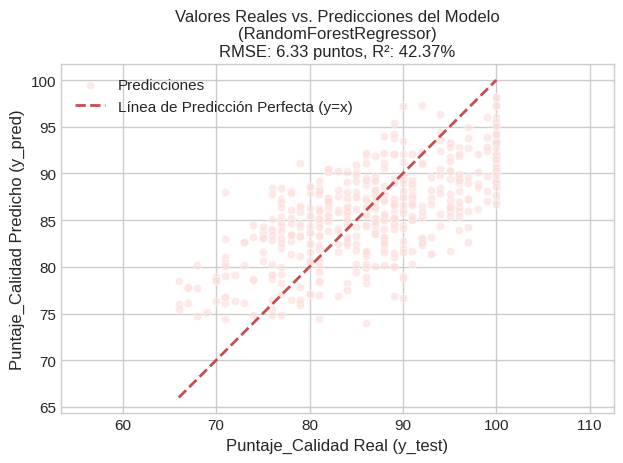

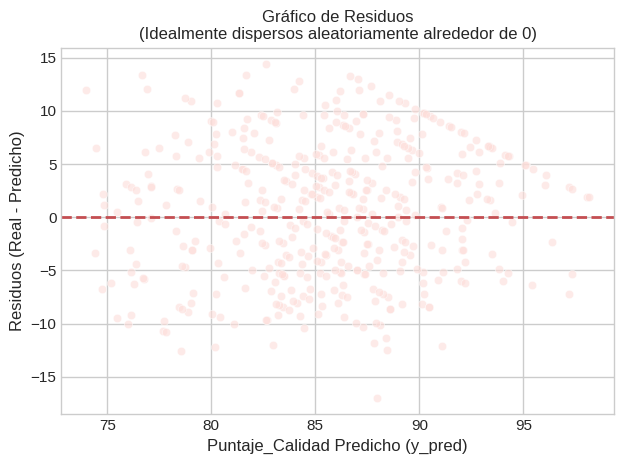

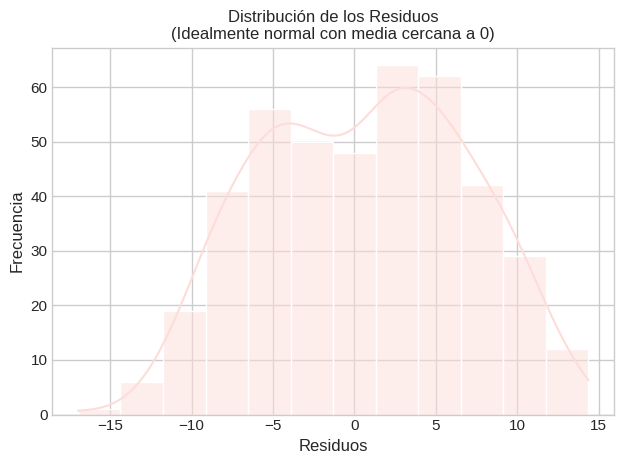

In [185]:
# --- Visualización de Predicciones vs. Valores Reales ---

# Gráfico de dispersión de valores reales vs. predichos
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='w', linewidth=0.5, label='Predicciones')

# Línea de predicción perfecta (y=x)
# Usamos los mínimos y máximos de y_test para asegurar que la línea cubra el rango de datos.
# Podríamos también usar los mínimos y máximos combinados de y_test e y_pred para una cobertura completa.
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Línea de Predicción Perfecta (y=x)')

# Etiquetas y título
plt.xlabel('Puntaje_Calidad Real (y_test)')
plt.ylabel('Puntaje_Calidad Predicho (y_pred)')
plt.title(f'Valores Reales vs. Predicciones del Modelo\n(RandomForestRegressor)\nRMSE: {rmse:.2f} puntos, R²: {r2:.2%}')
plt.legend()
plt.grid(True)
plt.axis('equal') # Asegura que la escala en X e Y sea la misma, para que la línea de 45° se vea como tal
plt.tight_layout() # Ajusta el layout para que todo encaje bien
plt.show()


# --- Visualización de Residuos (Opcional pero Recomendado) ---
# Los residuos son la diferencia entre los valores reales y los predichos (errores)
residuos = y_test - y_pred

plt.scatter(y_pred, residuos, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2) # Línea en y=0
plt.xlabel('Puntaje_Calidad Predicho (y_pred)')
plt.ylabel('Residuos (Real - Predicho)')
plt.title('Gráfico de Residuos\n(Idealmente dispersos aleatoriamente alrededor de 0)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Un histograma de los residuos también puede ser útil
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Residuos\n(Idealmente normal con media cercana a 0)')
plt.grid(True)
plt.tight_layout()
plt.show()

Número de importancias obtenidas: 66
Número de nombres de características procesadas: 66

Importancia de las características según RandomForestRegressor (Top 15):


,Feature,Importance
7,Tiempo_Crianza_Barrica_Meses,0.241073
3,Indice_Madurez_Cosecha_Brix,0.158942
2,Rendimiento_Hectarea_Kg,0.106384
1,Edad_Promedio_Vinedo_Anios,0.094693
0,Altitud_Vinedo_msnm,0.057916
4,Acidez_Total_Mosto_gL,0.035291
6,Temp_Max_Fermentacion_C,0.031577
9,Alcohol_Porcentaje_Vol,0.028868
10,Azucar_Residual_gL,0.026076
12,Extracto_Seco_gL,0.023985


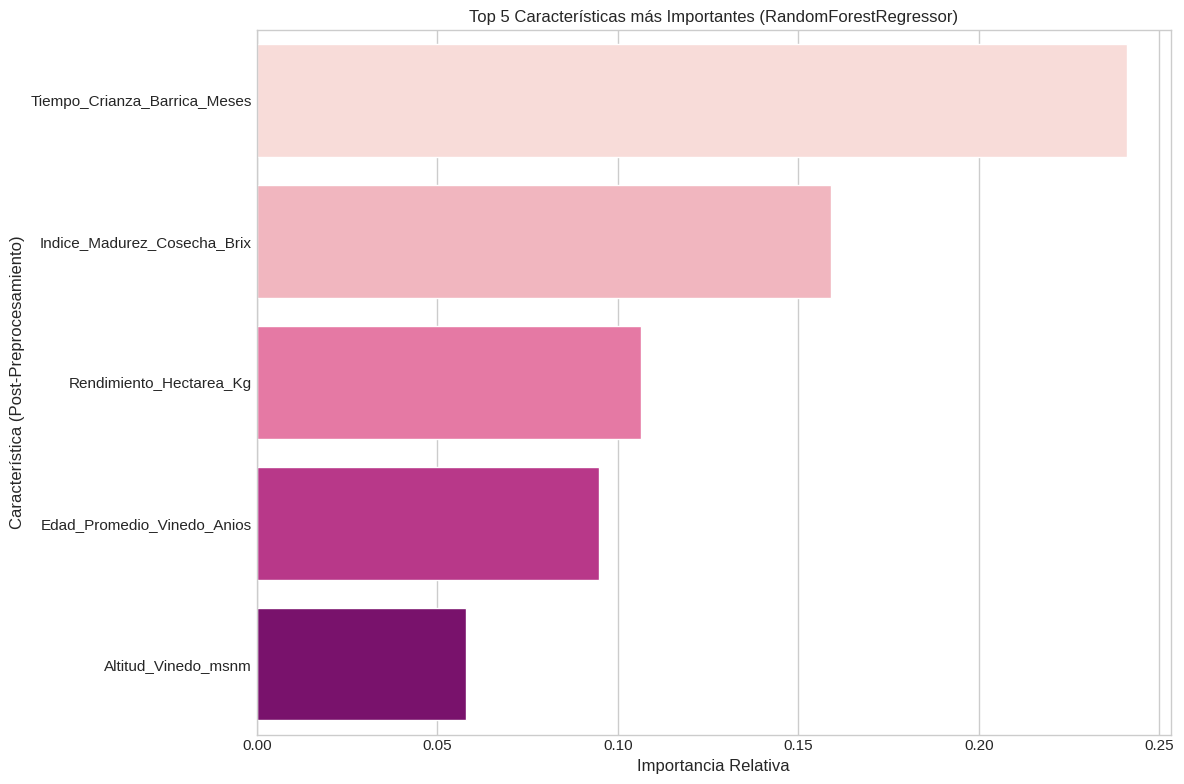

In [188]:
# --- Análisis de Importancia de Características ---

# Acceder al modelo RandomForestRegressor DENTRO del pipeline entrenado
regressor_model = model_pipeline.named_steps['regressor']

# Obtener las importancias de las características del modelo
importances = regressor_model.feature_importances_

# Obtener los nombres de las características DESPUÉS del preprocesamiento
# Esto es un poco más complejo debido al OneHotEncoder.
# Necesitamos acceder al ColumnTransformer y luego al OneHotEncoder para obtener los nombres generados.

preprocessor_fitted = model_pipeline.named_steps['preprocessor']

# Nombres de características numéricas (estas no cambian de nombre por StandardScaler o SimpleImputer)
num_feature_names = numerical_features # Ya los teníamos

# Nombres de características categóricas después del OneHotEncoding
# Accedemos al transformador 'cat' y luego al paso 'onehot' dentro de ese pipeline
onehot_encoder_fitted = preprocessor_fitted.named_transformers_['cat'].named_steps['onehot']
cat_feature_names_ohe = onehot_encoder_fitted.get_feature_names_out(input_features=categorical_features)

# Combinar todos los nombres de características en el orden correcto
# El ColumnTransformer concatena las salidas de los transformadores en el orden en que se definieron ('num' primero, luego 'cat')
all_processed_feature_names = list(num_feature_names) + list(cat_feature_names_ohe)

print(f"Número de importancias obtenidas: {len(importances)}")
print(f"Número de nombres de características procesadas: {len(all_processed_feature_names)}")

# Verificar que el número de importancias coincida con el número de nombres de características
if len(importances) == len(all_processed_feature_names):
    # Crear un DataFrame para visualizar la importancia
    feature_importance_df = pd.DataFrame({
        'Feature': all_processed_feature_names,
        'Importance': importances
    })
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("\nImportancia de las características según RandomForestRegressor (Top 15):")
    display(feature_importance_df.head(15))

    # Graficar la importancia de las características (por ejemplo, las 15 primeras)
    top_n = 5
    plt.figure(figsize=(12, 8)) # Ajustar tamaño para mejor visualización
    sns.barplot(
        x='Importance',
        y='Feature',
        data=feature_importance_df.head(top_n),
        palette='RdPu', # Puedes cambiar la paleta de colores
        hue='Feature',     # Usar 'hue' con 'Feature' para dar un color único a cada barra
        dodge=False        # Importante cuando 'hue' es la misma variable que 'y' para evitar barras separadas
    )
    plt.title(f'Top {top_n} Características más Importantes (RandomForestRegressor)')
    plt.xlabel('Importancia Relativa')
    plt.ylabel('Característica (Post-Preprocesamiento)')
    plt.legend([],[], frameon=False) # Ocultar la leyenda si no aporta mucho y hay muchas categorías
    plt.tight_layout() # Ajusta para que todo encaje bien
    plt.show()

else:
    print("\nERROR: El número de importancias de características no coincide con el número de nombres de características procesadas.")
    print("Esto puede suceder si el preprocesador o el pipeline no se han configurado o ajustado correctamente.")
    print(f"Importancias: {len(importances)}, Nombres: {len(all_processed_feature_names)}")

In [189]:
# Asumimos que las siguientes variables ya han sido calculadas y están disponibles:
# mae (Mean Absolute Error)
# rmse (Root Mean Squared Error)
# r2 (R-squared)
# feature_importance_df (DataFrame con la importancia de las características, ordenado)

# --- 10. Resumen de Resultados del Modelo de Regresión ---

print("\n=======================================================================")
print("      RESUMEN DE RESULTADOS: PREDICCIÓN DEL PUNTAJE_CALIDAD          ")
print("=======================================================================")

print("\n--- Métricas de Rendimiento del Modelo (en conjunto de prueba) ---")
print(f"- Error Absoluto Medio (MAE):       {mae:.3f} puntos")
print(f"  (En promedio, las predicciones se desvían ±{mae:.3f} puntos del puntaje real).")

print(f"- Raíz del Error Cuadrático Medio (RMSE): {rmse:.3f} puntos")
print(f"  (La desviación típica de los errores de predicción es de {rmse:.3f} puntos. Penaliza más los errores grandes).")

print(f"- Coeficiente de Determinación (R²): {r2:.2%}") # Mostrado como porcentaje
print(f"  (El modelo explica el {r2:.2%} de la varianza en el Puntaje_Calidad).")

# Determinar si el R² es bueno, regular o necesita mejorar (esto es subjetivo y depende del contexto)
r2_interpretation = "necesita una mejora significativa."
if r2 > 0.85:
    r2_interpretation = "excelente."
elif r2 > 0.70:
    r2_interpretation = "bueno."
elif r2 > 0.50:
    r2_interpretation = "aceptable, pero con margen de mejora."
elif r2 > 0.30:
    r2_interpretation = "limitado."

print(f"  (Un valor de R² de {r2:.2%} se considera {r2_interpretation} para este tipo de problema).")


print("\n--- Características Más Influyentes (según RandomForestRegressor) ---")
if 'feature_importance_df' in locals() and not feature_importance_df.empty:
    top_n_features = 3 # Puedes cambiar el número de características a mostrar
    most_important_features = feature_importance_df['Feature'].head(top_n_features).tolist()

    print(f"Las {top_n_features} características (o categorías específicas) que más influyeron en las predicciones fueron:")
    for i, feature in enumerate(most_important_features):
        print(f"  {i+1}. {feature} (Importancia: {feature_importance_df.iloc[i]['Importance']:.4f})")
else:
    print("No se pudo determinar la importancia de las características (feature_importance_df no está disponible o está vacío).")

print("\n--- Conclusión General ---")
# Aquí podrías añadir una breve conclusión basada en los resultados
if r2 > 0.6: # Umbral arbitrario para una "buena" predicción
    print("El modelo RandomForestRegressor ha demostrado una capacidad prometedora para predecir el Puntaje_Calidad del vino")
    print("basándose en sus atributos. Los errores de predicción (MAE y RMSE) son relativamente bajos, y una porción")
    print(f"significativa de la varianza en la calidad ({r2:.2%}) es explicada por el modelo.")
    print("Las características identificadas como más importantes ofrecen insights valiosos sobre los factores")
    print("clave que determinan la calidad del vino según este modelo.")
else:
    print("El rendimiento actual del modelo RandomForestRegressor para predecir el Puntaje_Calidad es limitado.")
    print(f"Con un R² de {r2:.2%}, una gran parte de la varianza en la calidad no es explicada por el modelo.")
    print("Se recomienda explorar más a fondo la ingeniería de características, probar otros algoritmos,")
    print("o realizar un ajuste de hiperparámetros más exhaustivo para mejorar los resultados.")

print("\n--- Próximos Pasos Sugeridos ---")
print("1. Análisis detallado de errores: ¿Dónde falla más el modelo?")
print("2. Ajuste de hiperparámetros (ej. GridSearchCV, RandomizedSearchCV) para optimizar el RandomForestRegressor.")
print("3. Probar otros algoritmos de regresión (ej. Gradient Boosting, XGBoost, SVR).")
print("4. Ingeniería de características más avanzada (ej. interacciones entre variables, transformaciones polinómicas).")
print("5. Si es posible, obtener más datos o características adicionales relevantes.")
print("=======================================================================")


      RESUMEN DE RESULTADOS: PREDICCIÓN DEL PUNTAJE_CALIDAD          

--- Métricas de Rendimiento del Modelo (en conjunto de prueba) ---
- Error Absoluto Medio (MAE):       5.384 puntos
  (En promedio, las predicciones se desvían ±5.384 puntos del puntaje real).
- Raíz del Error Cuadrático Medio (RMSE): 6.330 puntos
  (La desviación típica de los errores de predicción es de 6.330 puntos. Penaliza más los errores grandes).
- Coeficiente de Determinación (R²): 42.37%
  (El modelo explica el 42.37% de la varianza en el Puntaje_Calidad).
  (Un valor de R² de 42.37% se considera limitado. para este tipo de problema).

--- Características Más Influyentes (según RandomForestRegressor) ---
Las 3 características (o categorías específicas) que más influyeron en las predicciones fueron:
  1. Tiempo_Crianza_Barrica_Meses (Importancia: 0.2411)
  2. Indice_Madurez_Cosecha_Brix (Importancia: 0.1589)
  3. Rendimiento_Hectarea_Kg (Importancia: 0.1064)

--- Conclusión General ---
El rendimiento actual

In [162]:
# Asumimos que las siguientes variables ya han sido calculadas y están disponibles:
# r2 (R-squared del modelo RandomForestRegressor en el conjunto de prueba)
# mae (Mean Absolute Error del modelo RandomForestRegressor en el conjunto de prueba)
# rmse (Root Mean Squared Error del modelo RandomForestRegressor en el conjunto de prueba)
# r2_dummy (R-squared del modelo DummyRegressor que predice la media, calculado previamente)
# rmse_dummy (RMSE del modelo DummyRegressor)

print("\n=======================================================================")
print("                VALIDACIÓN DE LA HIPÓTESIS DEL MODELO                ")
print("=======================================================================")

print("Hipótesis:")
print("  H0: Las características seleccionadas NO tienen una relación predictiva significativa con el Puntaje_Calidad.")
print("      Un modelo basado en ellas no será mucho mejor que un modelo base (ej. predecir la media).")
print("  H1: Las características seleccionadas SÍ tienen una relación predictiva significativa con el Puntaje_Calidad.")
print("      Un modelo basado en ellas puede explicar una porción considerable de la varianza y superar al modelo base.")

print("\n--- Resultados del Modelo Actual (RandomForestRegressor) ---")
print(f"- Coeficiente de Determinación (R²): {r2:.4f} ({r2:.2%})")
print(f"- Raíz del Error Cuadrático Medio (RMSE): {rmse:.3f} puntos")
print(f"- Error Absoluto Medio (MAE): {mae:.3f} puntos")

# (Opcional) Re-calcular o asegurar que tenemos las métricas del modelo base
if 'r2_dummy' not in locals() or 'rmse_dummy' not in locals():
    print("\nCalculando métricas del modelo base (Dummy Regressor) para comparación...")
    from sklearn.dummy import DummyRegressor
    dummy_reg = DummyRegressor(strategy="mean")
    # Asumimos que X_train y y_train están disponibles si necesitamos ajustar de nuevo
    dummy_reg.fit(X_train, y_train)
    y_pred_dummy = dummy_reg.predict(X_test)
    r2_dummy = r2_score(y_test, y_pred_dummy)
    rmse_dummy = np.sqrt(mean_squared_error(y_test, y_pred_dummy))
    print(f"- R² del Modelo Base (prediciendo la media): {r2_dummy:.4f}")
    print(f"- RMSE del Modelo Base: {rmse_dummy:.3f} puntos")
else:
    print("\n--- Resultados del Modelo Base (Prediciendo la Media) ---")
    print(f"- R² del Modelo Base: {r2_dummy:.4f}")
    print(f"- RMSE del Modelo Base: {rmse_dummy:.3f} puntos")


print("\n--- Evaluación de la Hipótesis ---")

# Definir umbrales (estos son ejemplos y pueden ajustarse según el dominio y expectativas)
umbral_r2_aceptable = 0.50 # Un R² por encima de 0.50 podría considerarse que el modelo tiene algún poder predictivo.
mejora_significativa_rmse = rmse < (rmse_dummy * 0.90) # El RMSE es al menos un 10% mejor que el dummy.

if r2 > umbral_r2_aceptable and r2 > r2_dummy and mejora_significativa_rmse:
    print("\nRESULTADO: La hipótesis alternativa (H1) es soportada por los resultados.")
    print("El modelo RandomForestRegressor:")
    print(f"  1. Explica una porción considerable de la varianza del Puntaje_Calidad (R² = {r2:.2%}, que es > {umbral_r2_aceptable:.2%}).")
    print(f"  2. Supera significativamente a un modelo base que predice la media (RMSE del modelo: {rmse:.3f} vs. RMSE base: {rmse_dummy:.3f}).")
    print("Por lo tanto, se considera que las características seleccionadas tienen valor predictivo.")
    print("Rechazamos la hipótesis nula (H0).")

elif r2 > r2_dummy and mejora_significativa_rmse: # Supera al dummy pero no alcanza el R² deseado
    print("\nRESULTADO: Hay evidencia parcial a favor de la hipótesis alternativa (H1), pero el rendimiento general podría mejorar.")
    print("El modelo RandomForestRegressor:")
    print(f"  1. Supera a un modelo base (RMSE del modelo: {rmse:.3f} vs. RMSE base: {rmse_dummy:.3f}).")
    print(f"  2. Sin embargo, el poder explicativo del modelo (R² = {r2:.2%}) podría no alcanzar el umbral deseado de {umbral_r2_aceptable:.2%}.")
    print("Las características tienen cierto valor predictivo, pero se recomienda seguir trabajando para mejorar el modelo.")
    print("No podemos rechazar H0 con total confianza sin mejoras adicionales, o aceptamos H1 con reservas.")
else:
    print("\nRESULTADO: La hipótesis alternativa (H1) no es fuertemente soportada por los resultados actuales, o el modelo tiene un rendimiento bajo.")
    print("El modelo RandomForestRegressor:")
    if r2 <= r2_dummy:
        print(f"  1. No supera (o es peor que) un modelo base que predice la media (R² del modelo: {r2:.2%} vs. R² base: {r2_dummy:.2%}).")
    if not mejora_significativa_rmse:
        print(f"  2. La reducción en el error (RMSE) respecto al modelo base no es sustancial (RMSE del modelo: {rmse:.3f} vs. RMSE base: {rmse_dummy:.3f}).")
    if r2 <= umbral_r2_aceptable:
         print(f"  3. El poder explicativo del modelo (R² = {r2:.2%}) es inferior al umbral deseado de {umbral_r2_aceptable:.2%}.")
    print("Esto sugiere que las características actuales, tal como son procesadas por este modelo, podrían no ser suficientes")
    print("o que el modelo necesita una optimización significativa (ingeniería de características, ajuste de hiperparámetros, otro algoritmo).")
    print("No podemos rechazar la hipótesis nula (H0) con la evidencia actual.")

print("=======================================================================")


                VALIDACIÓN DE LA HIPÓTESIS DEL MODELO                
Hipótesis:
  H0: Las características seleccionadas NO tienen una relación predictiva significativa con el Puntaje_Calidad.
      Un modelo basado en ellas no será mucho mejor que un modelo base (ej. predecir la media).
  H1: Las características seleccionadas SÍ tienen una relación predictiva significativa con el Puntaje_Calidad.
      Un modelo basado en ellas puede explicar una porción considerable de la varianza y superar al modelo base.

--- Resultados del Modelo Actual (RandomForestRegressor) ---
- Coeficiente de Determinación (R²): 0.3937 (39.37%)
- Raíz del Error Cuadrático Medio (RMSE): 6.034 puntos
- Error Absoluto Medio (MAE): 5.115 puntos

--- Resultados del Modelo Base (Prediciendo la Media) ---
- R² del Modelo Base: -0.0004
- RMSE del Modelo Base: 7.751 puntos

--- Evaluación de la Hipótesis ---

RESULTADO: Hay evidencia parcial a favor de la hipótesis alternativa (H1), pero el rendimiento general podría